

---


# Gross Domestic Household Income Prediction
**Notebook Author - Taritro Ghoshal**

This notebook provides a comprehensive analysis of the 2011 ONS Census data with the primary objective to predict the Gross Domestic Household Income (GDHI) per Head for 2011. GDHI is an instrumental metric, offering insights into the economic health of a region and aiding in policy and economic decision-making.

Outline:

1. Import Necessary Libraries: Setting up the environment with the essential tools for our analysis.
 - Initial Exploration and Cleaning: A cursory examination of our dataset, identifying, and rectifying irregularities.

2. Exploratory Data Analysis (EDA):
 - Target Variable EDA: Deep-dive into our primary metric, understanding its distribution and characteristics.
 - Data EDA: Systematic exploration of our feature set, using:
    - Univariate Analysis: Studying individual features.
    - Bivariate Analysis: Understanding the relationship between two variables
    - Dimensionality Reduction Visualizations: Gaining insights from a reduced-dimensional space.
3. Feature Engineering & Correlation Analysis: Enhancing the data by crafting new features and analyzing inter-feature relationships.
4. Data Preparation for Modelling: Transformations ensuring the data is primed for predictive modeling
5. Modelling:
  - Model Scores with Engineered Features and Feature Elimination: Evaluating performance impact due to our feature manipulations.
  - Hyperparameter Optimization: Searching for the optimal model configurations.
  - Best Model Configurations: A compilation of our top-performing model setups.
  - Stacking/Voting Regressor: Leveraging an ensemble approach for potentially improved predictions.

---



# Import Necessary Libraries

In [43]:
## Install additional libraries for optimization and modelling
!pip install bayesian_optimization --quiet
!pip install -q catboost

In [44]:
## Import the necessary libraries required for the task

## Data Manipulation and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns

## Various libraries for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, VotingRegressor, AdaBoostRegressor,GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor, Dataset
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier

## Optimization Library
from bayes_opt import BayesianOptimization

# Setting a maximum width for columns display in pandas dataframe
pd.set_option('display.max_colwidth', -1)

# Turning off warnings
import warnings
warnings.simplefilter('ignore')

## Data Introduction
The dataset for this project originates from the 2011 census data provided by the UK's Office of National Statistics (ONS). The overarching goal is to harness this comprehensive dataset to predict the Gross Domestic Household Income per Head for the year 2011, segregated by Local Authority.
Dataset Components:

- census_2011.csv: This file contains the primary set of features, each encapsulating various socio-economic, demographic, and geographical facets per Local Authority. Noteworthy attributes encompass population size, area in hectares, population density, gender distribution, age brackets, household specifics, qualification levels, employment statuses, types of owned properties, and numerous others.
- GDHI_per_head_2011.csv: This file presents the target variable - Gross Domestic Household Income per Head in 2011. Each entry is coherently mapped to its respective Local Authority, aligning with the feature set provided in the census data.

The intent is to construct a robust predictive model that can adeptly forecast the Gross Domestic Household Income per Head based on the nuanced attributes derived from the 2011 census data.

In [45]:
## Load the datasets
X = pd.read_csv('/content/drive/MyDrive/stubbenedge_assignment/census_2011.csv')
Y = pd.read_csv('/content/drive/MyDrive/stubbenedge_assignment/GDHI_per_head_2011.csv')

## Initial Exploration and Cleaning

In [46]:
X.head()

GeographyCode  population_size  area_hectares  population_density  \
0  E07000178     151906           4559.58        33.315788            
1  E08000003     503127           11564.49       43.506199            
2  E09000025     307984           3622.36        85.023024            
3  E09000030     254096           1976.90        128.532551           
4  E06000018     305680           7461.16        40.969501            

        male     female  no_passport_held  no_usual_residents  median_age  \
0  49.593169  50.406831  11.281977         4.021146            29           
1  50.210583  49.789417  15.410423         4.388530            29           
2  52.059847  47.940153  7.229921          2.024764            29           
3  51.518324  48.481676  6.607739          4.596932            29           
4  50.306530  49.693470  20.354292         4.145578            30           

    age_0_4  ...  industry_accommodation_food_services  \
0  6.089950  ...  6.828828                               
1  7.237338  ...  9.215507                               
2  8.241987  ...  11.826747                              
3  7.379101  ...  9.783823                               
4  6.529377  ...  7.892516                               

   industry_information_communication  industry_finance_insurance  \
0  6.582434                            1.249158                     
1  4.137947                            4.224515                     
2  4.171259                            5.115738                     
3  8.094446                            14.971085                    
4  3.335552                            2.273207                     

   industry_real_estate  industry_professional_science_technical  \
0  0.921111              9.374418                                  
1  1.564306              7.459816                                  
2  1.672279              5.367146                                  
3  1.691031              13.472819                                 
4  1.449464              4.582123                                  

   industry_admin_support_service  industry_public_service  \
0  3.509677                        3.183062                  
1  6.720479                        3.954985                  
2  8.766817                        4.159180                  
3  4.866265                        3.746908                  
4  5.999124                        4.574007                  

   industry_education  industry_health_social_work  industry_other  
0  23.567837           15.093042                    5.366224        
1  11.347418           14.253761                    5.269881        
2  8.546363            10.331889                    4.692950        
3  9.068196            8.115129                     5.950874        
4  10.577188           14.687789                    4.930286        

[5 rows x 83 columns]

In [47]:
Y.head()

LAD_code   _2011
0  E06000001  13 411
1  E06000004  14 809
2  E06000002  12 859
3  E06000003  13 665
4  E06000005  13 799

In [48]:
## Exploring the dimensions of the data
print("Shape of data", X.shape)
print("Shape of label", Y.shape)

Shape of data (348, 83)
Shape of label (374, 2)


Here, I am merging features (X) and targets (Y) into a single dataframe (full_df). It's based on the 'GeographyCode'. Additionally,  cleaning the target data by removing spaces.

In [49]:
## Merging on 'GeographyCode' since it's a unique identifier for each row and exists in both datasets.
full_df = X.merge(Y.rename({'LAD_code': 'GeographyCode'}, axis=1), on='GeographyCode', how='left', indicator=True)

In [50]:
full_df['_merge'].value_counts()

both          317
left_only     31 
right_only    0  
Name: _merge, dtype: int64

In [51]:
## Ensuring we only keep rows where the merge was successful
full_df = full_df[full_df['_merge'] == 'both']

In [52]:
full_df['GeographyCode'].nunique()

317

In [53]:
## Cleaning the target column by removing spaces and converting to integer type
target_col = "_2011"
full_df[target_col] = full_df[target_col].str.replace(' ', '').astype(int)

# Exploratory Data Analysis
This section is focused on the Exploratory Data Analysis (EDA) part. EDA is crucial before diving into modeling as it provides insights about the data, including distributions, potential outliers, missing values, and other statistical properties.

In [54]:
## Getting info about the columns, data types, and null values
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 346
Data columns (total 85 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   GeographyCode                                       317 non-null    object  
 1   population_size                                     317 non-null    int64   
 2   area_hectares                                       317 non-null    float64 
 3   population_density                                  317 non-null    float64 
 4   male                                                317 non-null    float64 
 5   female                                              317 non-null    float64 
 6   no_passport_held                                    317 non-null    float64 
 7   no_usual_residents                                  317 non-null    float64 
 8   median_age                                          317 non-null    in

In [55]:
## Summary statistics of the dataframe
full_df.describe()

population_size  area_hectares  population_density        male  \
count  3.170000e+02     317.000000     317.000000          317.000000   
mean   1.659003e+05     42586.967256   16.525186           49.149057    
std    1.116608e+05     59332.612666   23.849153           0.725940     
min    2.203000e+03     289.780000     0.245356            47.490838    
25%    9.736500e+04     7909.520000    2.094603            48.764329    
50%    1.313010e+05     21696.910000   5.952193            49.106297    
75%    2.038260e+05     57584.710000   22.471121           49.479118    
max    1.073045e+06     518037.010000  138.715973          55.471186    

           female  no_passport_held  no_usual_residents  median_age  \
count  317.000000  317.000000        317.000000          317.000000   
mean   50.850943   17.420987         4.596054            40.309148    
std    0.725940    5.707230          2.758760            4.361694     
min    44.528814   3.176824          1.740870            29.000000    
25%    50.520882   14.120720         3.172058            38.000000    
50%    50.893703   17.473689         3.905786            41.000000    
75%    51.235671   21.950758         4.875942            43.000000    
max    52.509162   29.958175         28.797696           51.000000    

          age_0_4     age_5_7  ...  industry_information_communication  \
count  317.000000  317.000000  ...  317.000000                           
mean   6.020578    3.365374    ...  3.727362                             
std    0.910236    0.375329    ...  2.210705                             
min    3.200000    1.586441    ...  0.533944                             
25%    5.418982    3.085861    ...  2.243273                             
50%    5.957241    3.350300    ...  2.973451                             
75%    6.566048    3.618054    ...  4.565391                             
max    10.045667   4.835109    ...  12.616587                            

       industry_finance_insurance  industry_real_estate  \
count  317.000000                  317.000000             
mean   4.045321                    1.408817               
std    2.780903                    0.364263               
min    0.909063                    0.707042               
25%    2.270731                    1.184323               
50%    3.307025                    1.369286               
75%    5.033847                    1.575442               
max    22.477354                   3.393662               

       industry_professional_science_technical  \
count  317.000000                                
mean   6.347628                                  
std    3.026704                                  
min    1.678108                                  
25%    4.438125                                  
50%    5.633351                                  
75%    7.368222                                  
max    26.648410                                 

       industry_admin_support_service  industry_public_service  \
count  317.000000                      317.000000                
mean   4.737468                        6.101928                  
std    0.878956                        2.143065                  
min    2.983419                        2.291521                  
25%    4.129066                        4.847688                  
50%    4.552646                        5.618196                  
75%    5.227392                        6.763232                  
max    8.766817                        25.986688                 

       industry_education  industry_health_social_work  industry_other  \
count  317.000000          317.000000                   317.000000       
mean   9.834950            12.459455                    4.893585         
std    1.844792            2.153814                     0.905286         
min    6.013245            5.224352                     3.271984         
25%    8.875609            10.890369                    4.326573         
50%    9.618824     

Checking if there are any missing values in the dataframe

In [56]:
full_df.isnull().sum()[full_df.isnull().sum() > 0]

Series([], dtype: int64)

No null-values present

Checking if there are any duplicate rows in the dataframe

In [57]:
full_df[full_df.duplicated(keep=False)]

Empty DataFrame
Columns: [GeographyCode, population_size, area_hectares, population_density, male, female, no_passport_held, no_usual_residents, median_age, age_0_4, age_5_7, age_8_9, age_10_14, age_15, age_16_17, age_18_19, age_20_24, age_25_29, age_30_44, age_45_59, age_60_64, age_65_74, age_75_84, age_85_89, age_90_over, number_of_households, average_household_size, average_number_of_rooms_per_household, occupancy_rating_minus_1_or_worse, has_central_heating, no_vehicles, _1_vehicle_per_household, _2_vehicles_per_household, _3_vehicles_per_household, _4_or_more_vehicles_per_household, one_person_household, one_family_household, other_household_types, owned_outright, owned_with_mortgage_or_loan, shared_ownership, social_renting, private_renting, living_rent_free, no_qualifications, level_1_to_3_qualification, apprenticeship, level_4_and_up, other_qualifications, employed, unemployed, full_time_student, retired, economically_inactive, owned_outright_54, owned_with_mortgage_or_loan_55, shared_ownership_56, social_renting_57, private_renting_58, living_rent_free_59, detached_house, semi_detached_house, terraced_house, apartment, caravan_temporary_mobile_structure, industry_agriculture_forestry_fishing, industry_mining_quarrying, industry_manufacturing, industry_electricity_gas_steam_aircon_supply, industry_water_sewage_waste_management_remediation, industry_construction, industry_trade_repair_motor_vehicles_and_cycles, industry_transport_storage, industry_accommodation_food_services, industry_information_communication, industry_finance_insurance, industry_real_estate, industry_professional_science_technical, industry_admin_support_service, industry_public_service, industry_education, industry_health_social_work, industry_other, _2011, _merge]
Index: []

[0 rows x 85 columns]

No duplicates present

## Target Variable EDA

In [58]:
full_df.describe()[target_col]

count    317.000000   
mean     17532.381703 
std      8383.000713  
min      10874.000000 
25%      14351.000000 
50%      16351.000000 
75%      18563.000000 
max      144611.000000
Name: _2011, dtype: float64

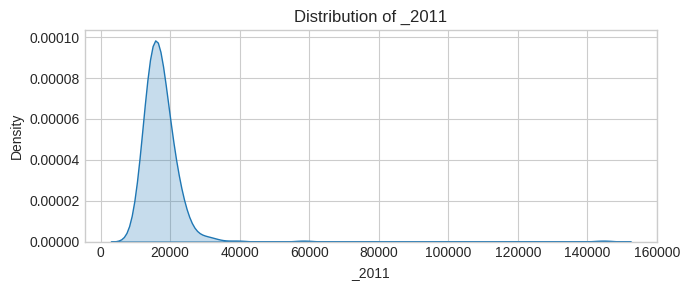

Skewness of _2011: 11.57


In [59]:
fig, ax = plt.subplots(figsize=(7, 3))

# KDE plot for the target variable
sns.kdeplot(data=full_df, x=target_col, ax=ax, fill=True)
ax.set_title(f'Distribution of {target_col}')

plt.tight_layout()
plt.show()

# Calculating skewness
skew_val = full_df[target_col].skew()
print(f"Skewness of {target_col}: {skew_val:.2f}")

The KDE plot provides a visualization of the distribution of our target variable, Gross Domestic Household Income per Head. As observed, the distribution exhibits a pronounced right-skew, which is further confirmed by a computed skewness value of 11.57. A right-skewed distribution indicates that most Local Authorities have a household income per head on the lower side, with fewer Local Authorities having exceptionally high values. This pattern is often seen in economic indicators, reflecting the nature of wealth distribution in many contexts.

For modeling strategies, tree-based and boosting algorithms are naturally adept at handling such distributions without the need for transformations. Their hierarchical structure and iterative refinement processes can capture the nuances of skewed datasets, making them particularly suitable for this kind of data.

## Data EDA
In these sections, I'm visualizing the distributions of individual columns (univariate analysis) and then exploring relationships between pairs of columns (bivariate analysis). This can help identify patterns, outliers, or other interesting relationships in the data.

In [60]:
## Listing out all the columns of the dataframe
num_cols = full_df.columns[1:-2]
target_col = full_df.columns[-2]
print(num_cols, len(num_cols))
print(target_col)

Index(['population_size', 'area_hectares', 'population_density', 'male',
       'female', 'no_passport_held', 'no_usual_residents', 'median_age',
       'age_0_4', 'age_5_7', 'age_8_9', 'age_10_14', 'age_15', 'age_16_17',
       'age_18_19', 'age_20_24', 'age_25_29', 'age_30_44', 'age_45_59',
       'age_60_64', 'age_65_74', 'age_75_84', 'age_85_89', 'age_90_over',
       'number_of_households', 'average_household_size',
       'average_number_of_rooms_per_household',
       'occupancy_rating_minus_1_or_worse', 'has_central_heating',
       'no_vehicles', '_1_vehicle_per_household', '_2_vehicles_per_household',
       '_3_vehicles_per_household', '_4_or_more_vehicles_per_household',
       'one_person_household', 'one_family_household', 'other_household_types',
       'owned_outright', 'owned_with_mortgage_or_loan', 'shared_ownership',
       'social_renting', 'private_renting', 'living_rent_free',
       'no_qualifications', 'level_1_to_3_qualification', 'apprenticeship',
       'leve

In [61]:
basic_cols = num_cols[:8]
age_cols = num_cols[8:24]
household_cols = num_cols[24:29]
vehicle_household_cols = num_cols[29:34]
other_household_cols = num_cols[34:64]
industry_cols = num_cols[64:]

print(len(basic_cols),
      len(age_cols),
      len(household_cols),
      len(vehicle_household_cols),
      len(other_household_cols),
      len(industry_cols))

8 16 5 5 30 18


In the provided code, the numerical columns from the dataset are being organized and categorized into distinct groups for a more structured analysis. The total dataset consists of 82 columns, and these columns are distributed across several themes:

- **Basic Columns (basic_cols)**: These consist of the first 8 numerical columns, capturing fundamental data points.
- **Age-Related Columns (age_cols)**: These include columns from 9th to 24th, which presumably represent various age brackets or age-related statistics.
- **Household Composition Columns (household_cols)**: Spanning from columns 25 to 29, they encapsulate household-related data.
- **Vehicle per Household Columns (vehicle_household_cols)**: Covering columns 30 to 34, these columns give insights into vehicle ownership or usage patterns in households.
- **Other Household Data Columns (other_household_cols)**: This is a broader set from columns 35 to 64, potentially capturing a diverse range of household-related statistics.
- **Industry-Related Columns (industry_cols)**: The remaining columns, from 65 onwards, appear to be associated with various industries or sectors.

By segregating the columns in this manner, I aim for a more focused and topic-specific exploratory data analysis, allowing us to delve deeper into each category's patterns and insights.

## Univariate analysis
Univariate analysis is done to understand the distribution of individual columns.

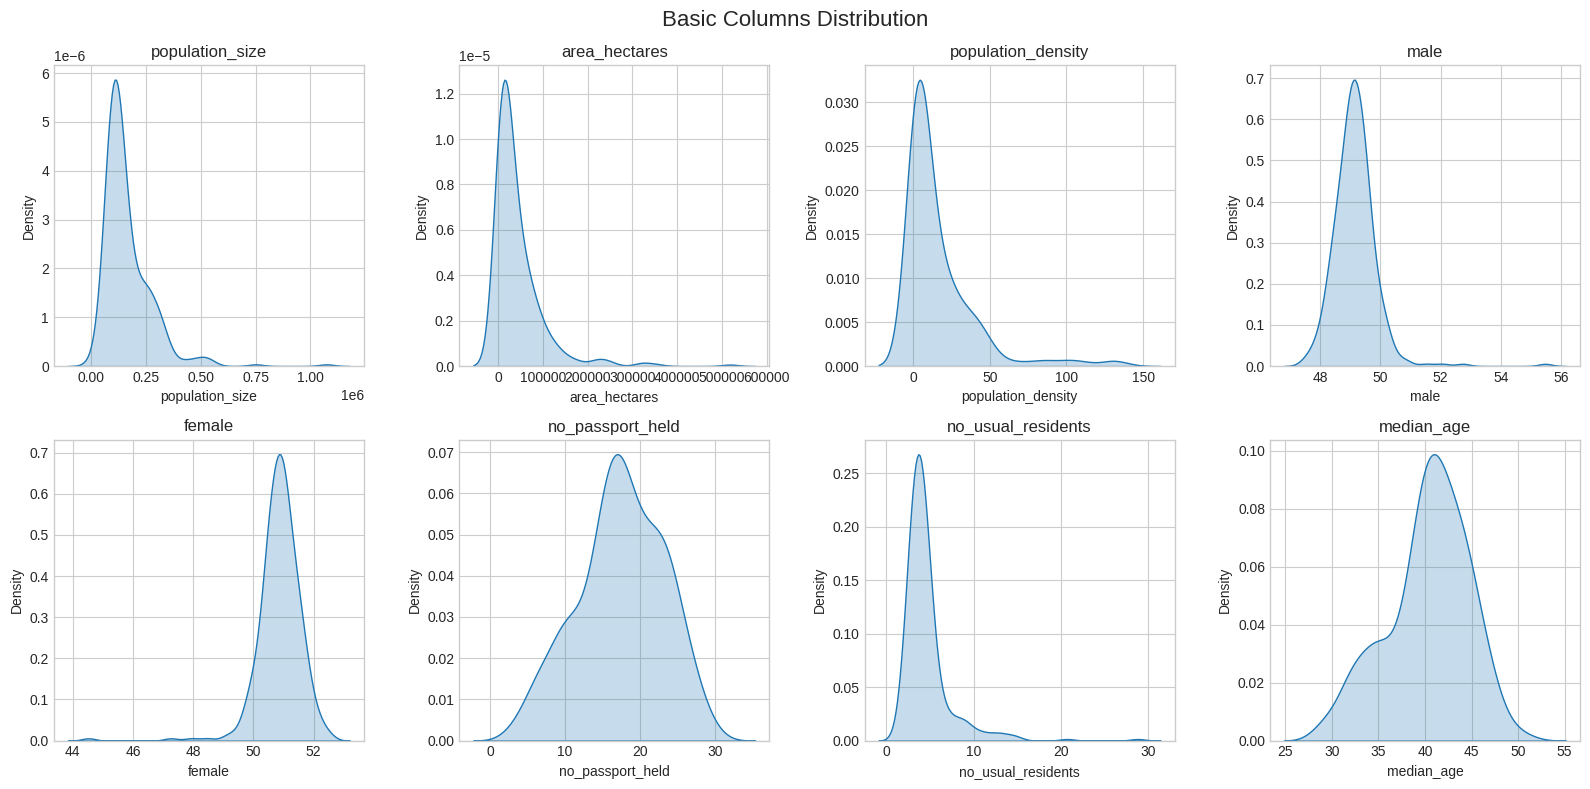

In [62]:
def plot_kdeplots(data, cols, title, n_cols=4):
    n_rows = int(len(cols) / n_cols) + (len(cols) % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    for ax, col in zip(axes.ravel(), cols):
        sns.kdeplot(data=data, x=col, ax=ax, fill=True)
        ax.set_title(col)

    # Cleanup
    for ax in axes.ravel()[len(cols):]:
        ax.axis('off')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_kdeplots(full_df, basic_cols, title="Basic Columns Distribution")

Features such as population_size, population_density, and area_hectares display a right-skewed distribution. This suggests that a majority of the data points for these features lie towards the lower end, with fewer high-valued outliers. The significant right skewness in area_hectares might hint at a few regions with exceptionally large areas compared to the majority.

On the contrary, columns like median_age and no_passport_held exhibit a more normal or bell-shaped distribution, signifying a balanced spread of data points across their range.

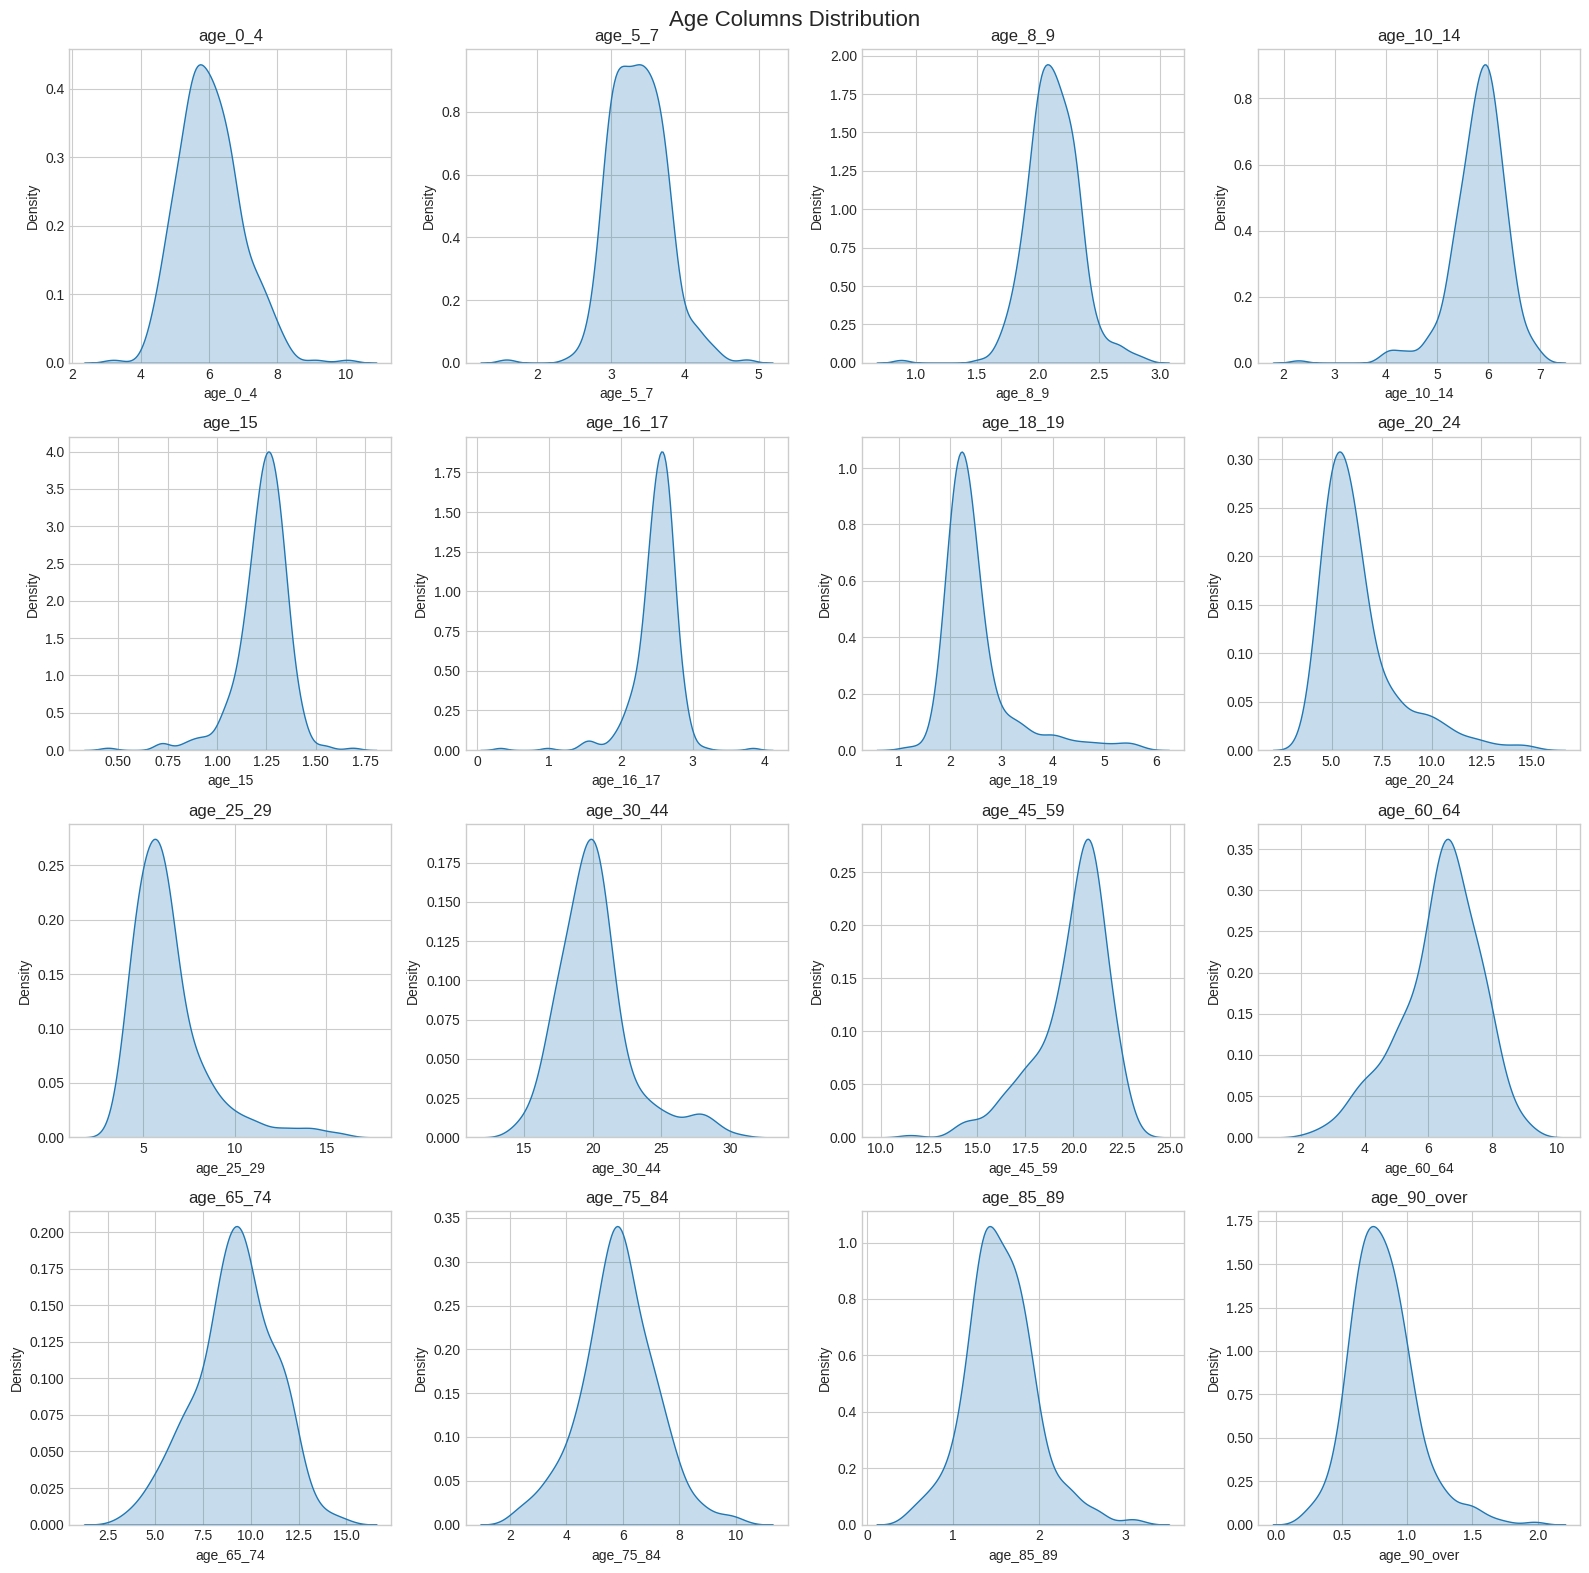

In [63]:
  plot_kdeplots(full_df, age_cols, title="Age Columns Distribution")

For the **Age Columns Distribution**:
- The data across different age ranges is largely normal, though some might exhibit slight skewness. This gives us an indication that the population across these age ranges is well-distributed with no particular age range overly dominating the dataset.

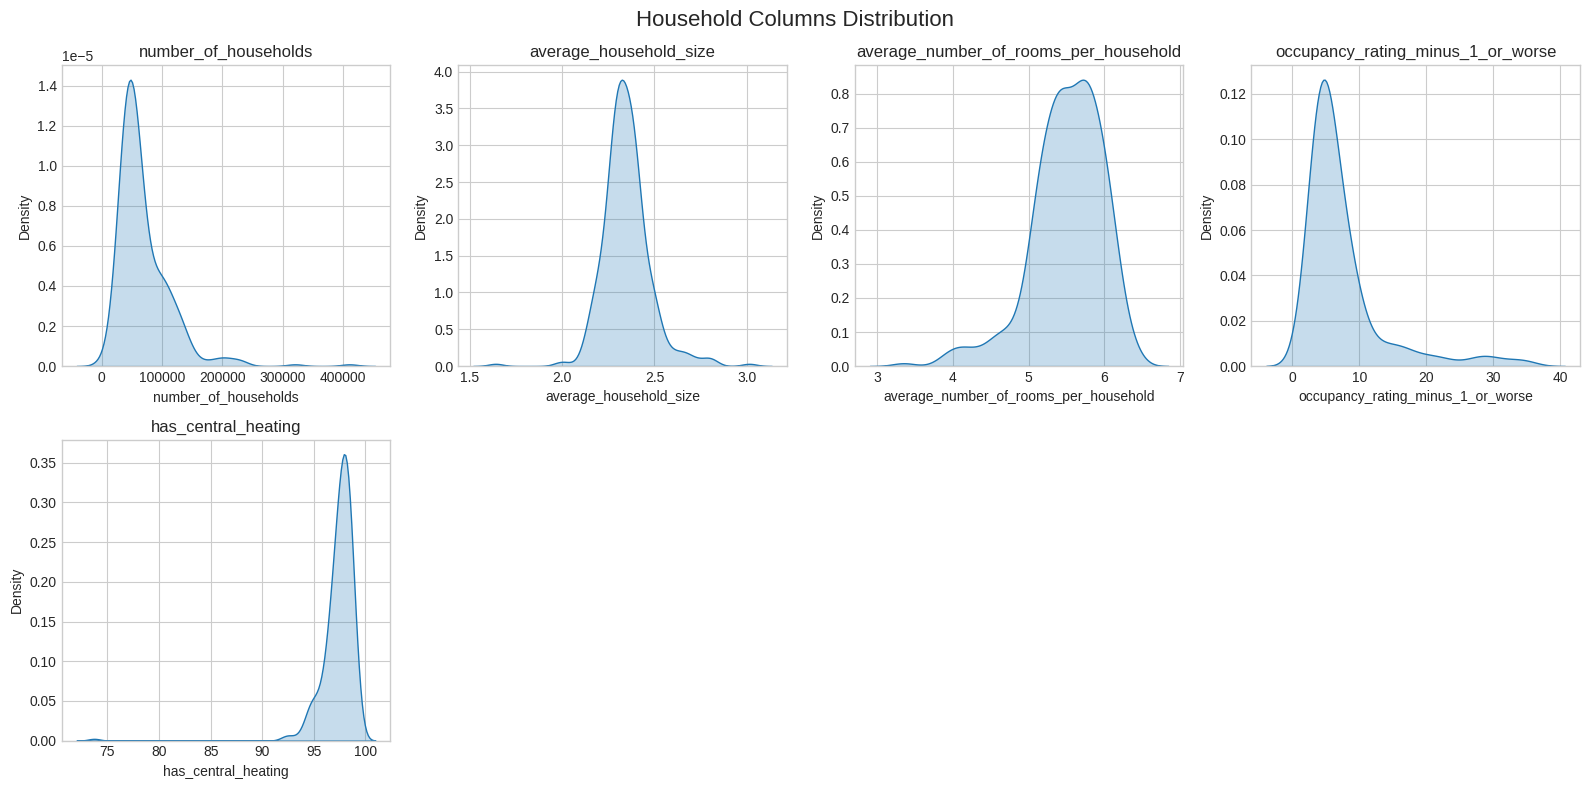

In [64]:
plot_kdeplots(full_df, household_cols, title="Household Columns Distribution")

For the **Household Columns Distribution**:
- The `average household size` column demonstrates a typical distribution centered around the value of 2, suggesting that the majority of households are composed of around two members.
- The `number of households` feature is right-skewed, indicating that there are areas with a high concentration of households, but the majority lie in the lower range, peaking around 50,000 households.
- A striking observation from this subset is the high left skew in households with `central heating`, implying that the vast majority of houses are equipped with this amenity.

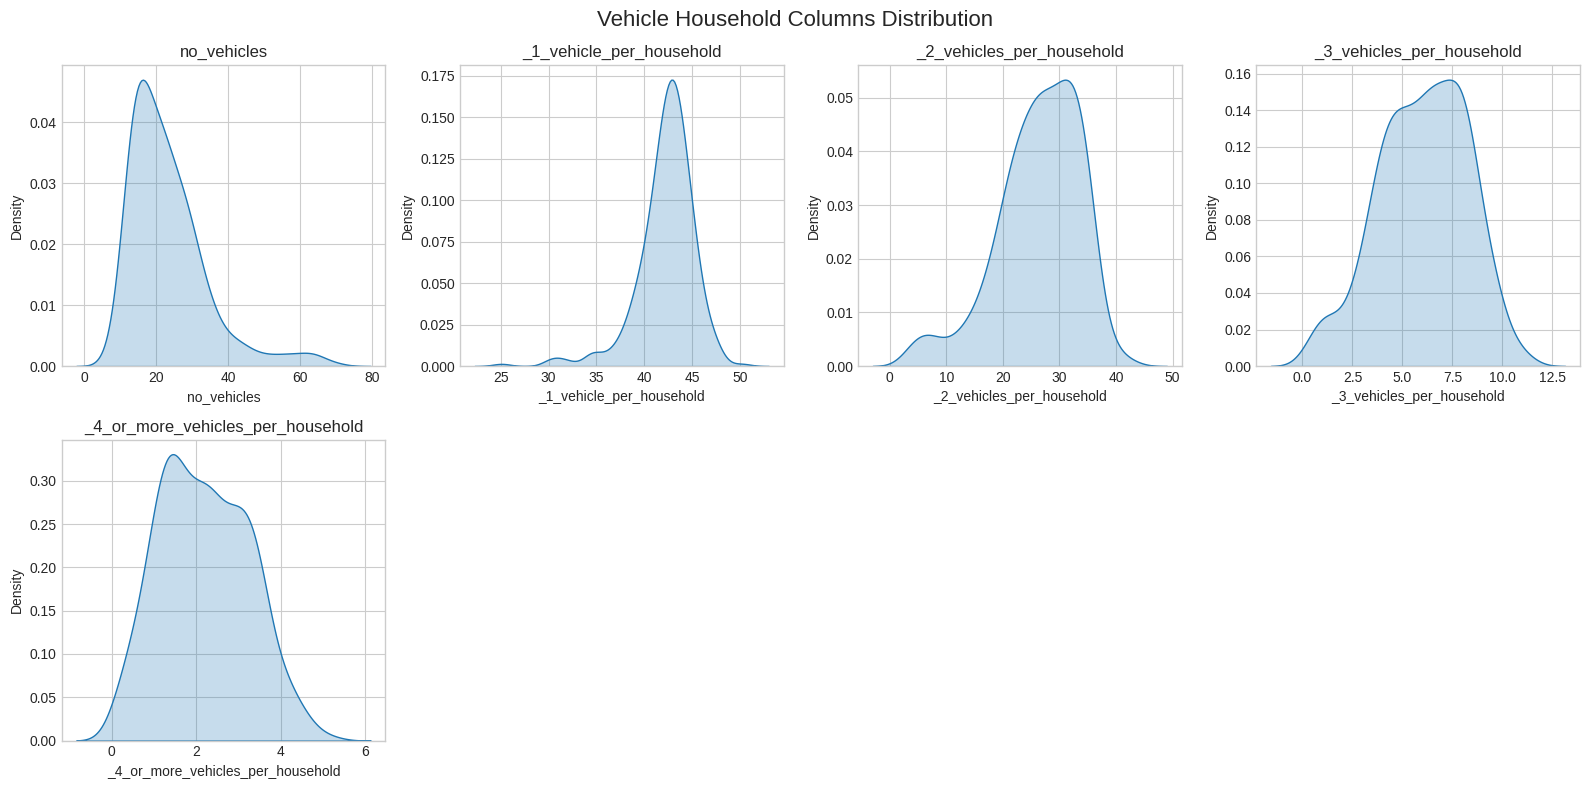

In [65]:
plot_kdeplots(full_df, vehicle_household_cols, title="Vehicle Household Columns Distribution")

In the **Vehicle Household Columns Distribution**:
- The prevailing trend is that most households possess 1 or 2 vehicles. This gives a sense of the vehicular accessibility or needs of most households.

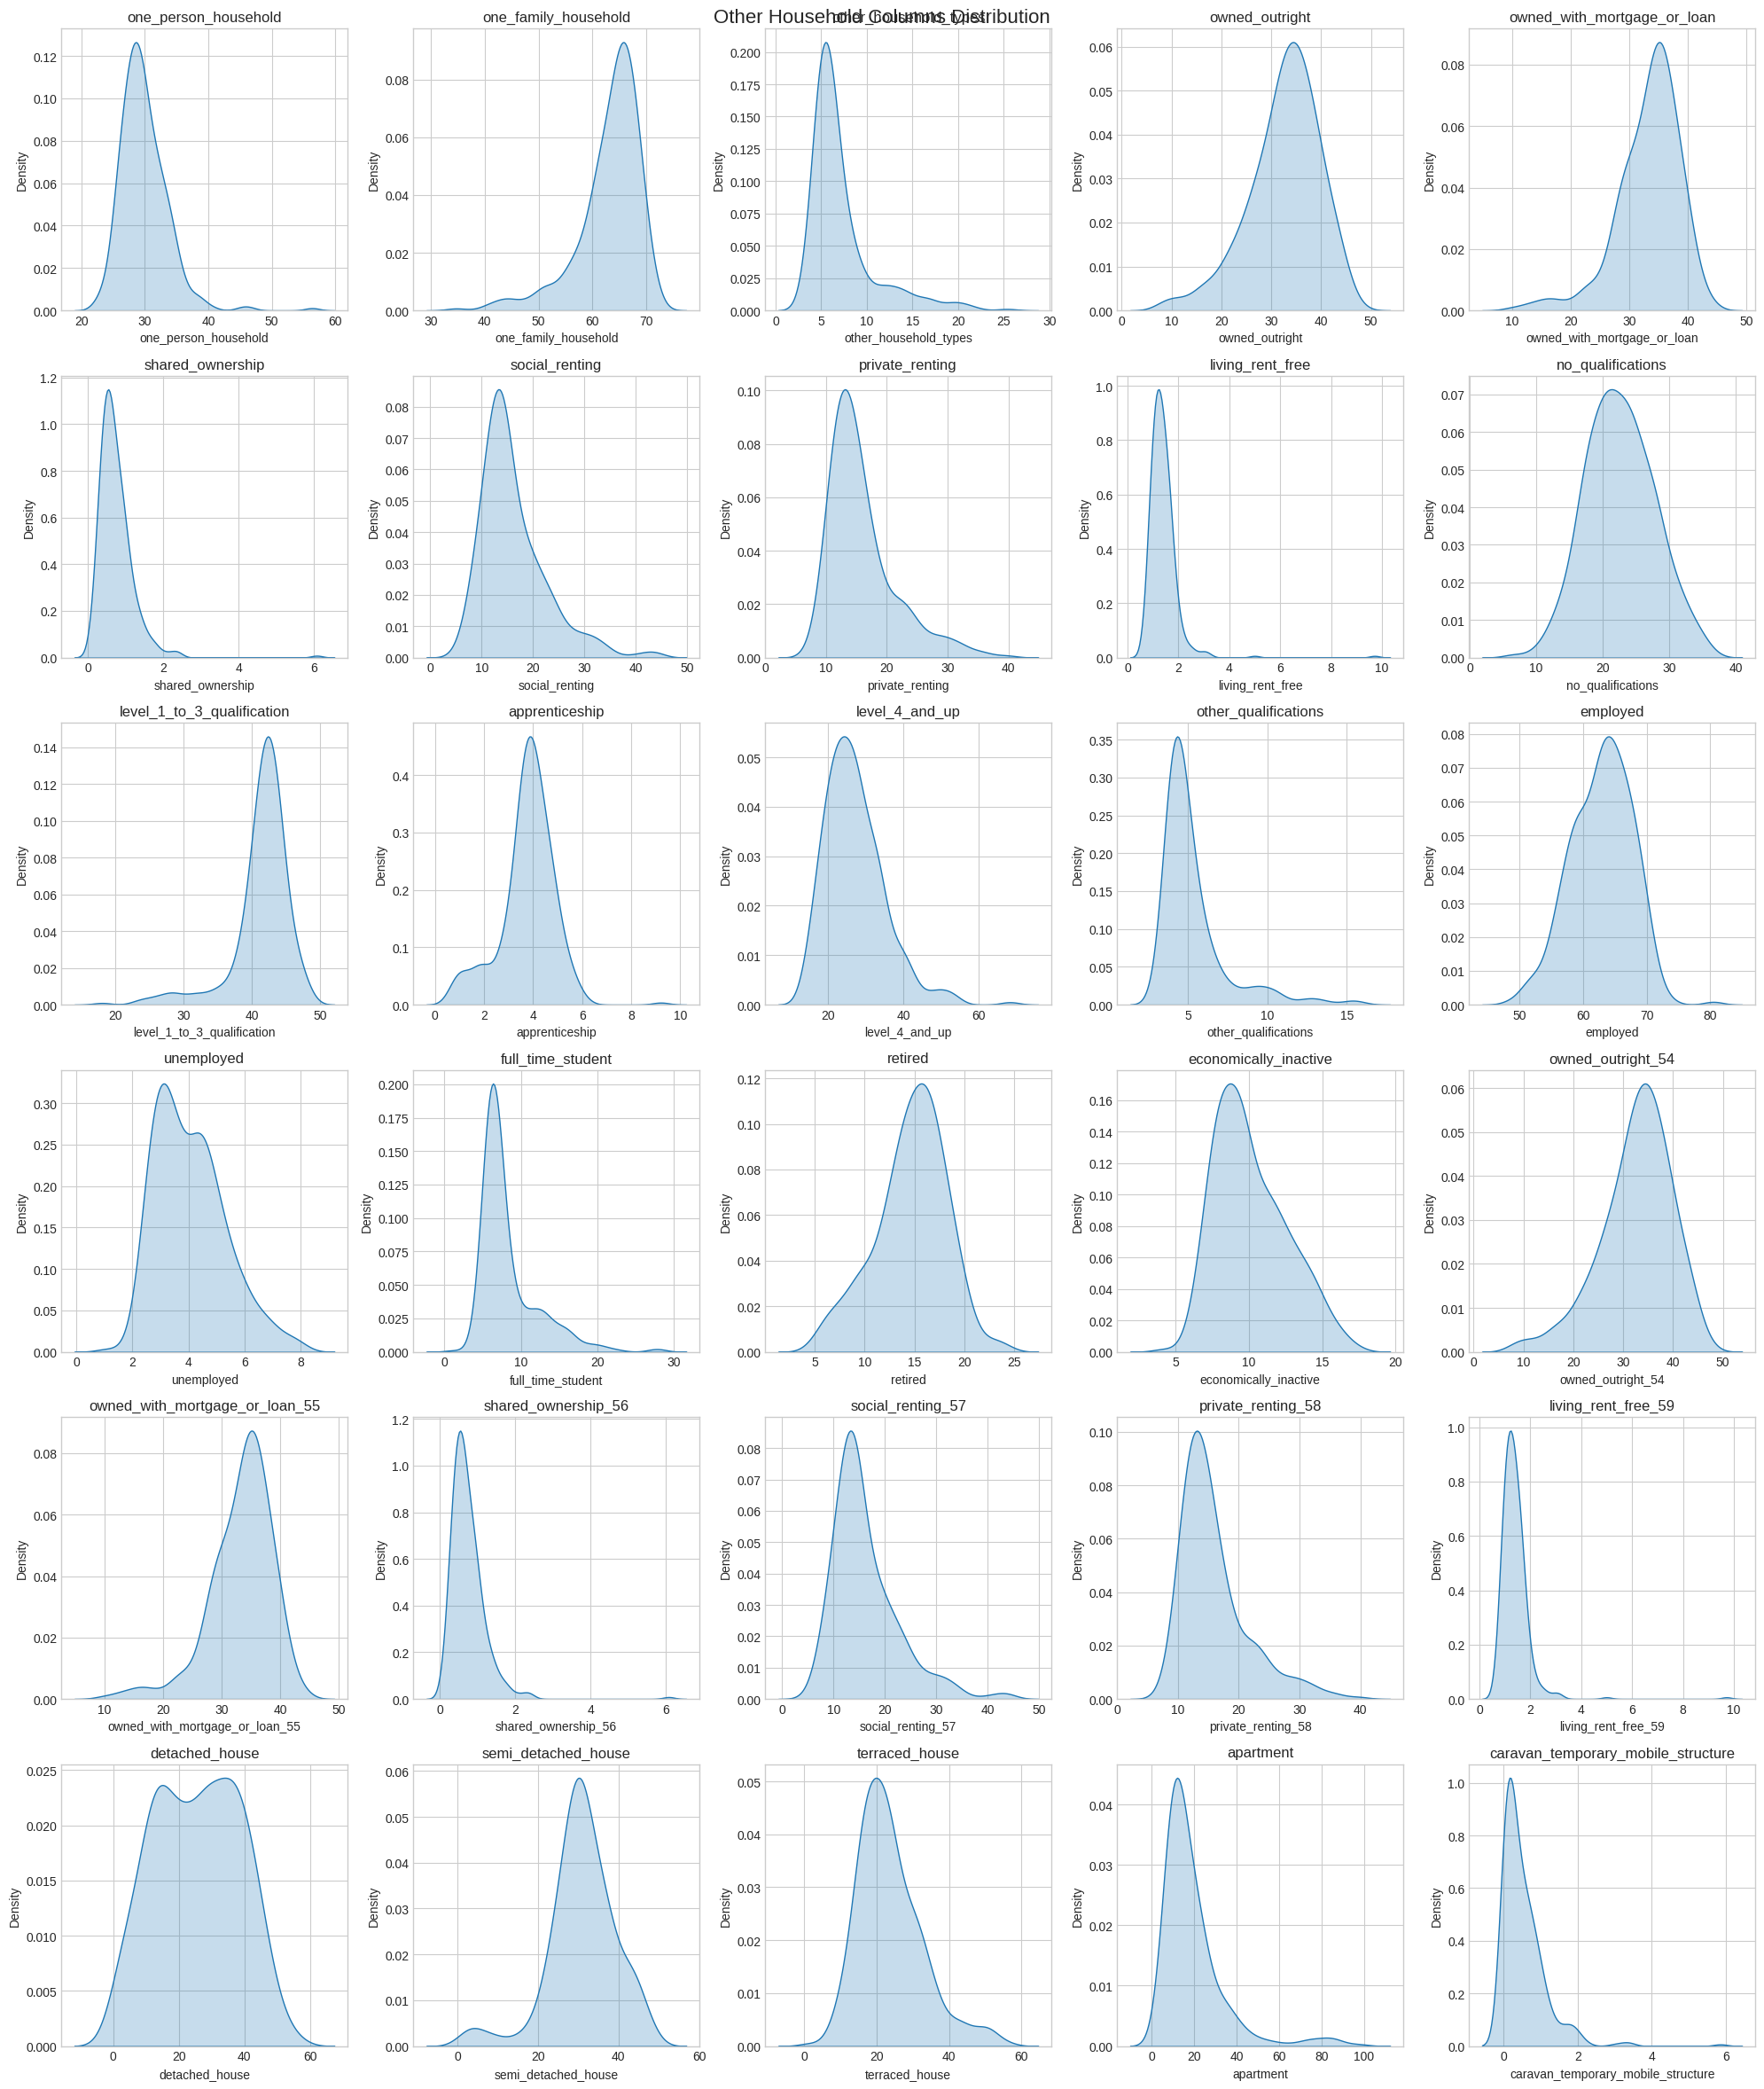

In [66]:
plot_kdeplots(full_df, other_household_cols, title="Other Household Columns Distribution", n_cols=5)

For the **Other Household Columns Distribution**:
- A notable proportion of the population, roughly around 20%, does not possess any qualifications.
- The majority are equipped with qualifications ranging from levels 1 to 3, while there's a decrease in frequency for levels above 4.
- Employment statistics offer a balanced view, with the distribution largely centered around 60%. The average unemployment rate is relatively low, standing at approximately 3%.
- When it comes to housing, the data points to a trend where most people either fully own their residences or own them with the assistance of a mortgage or loan.


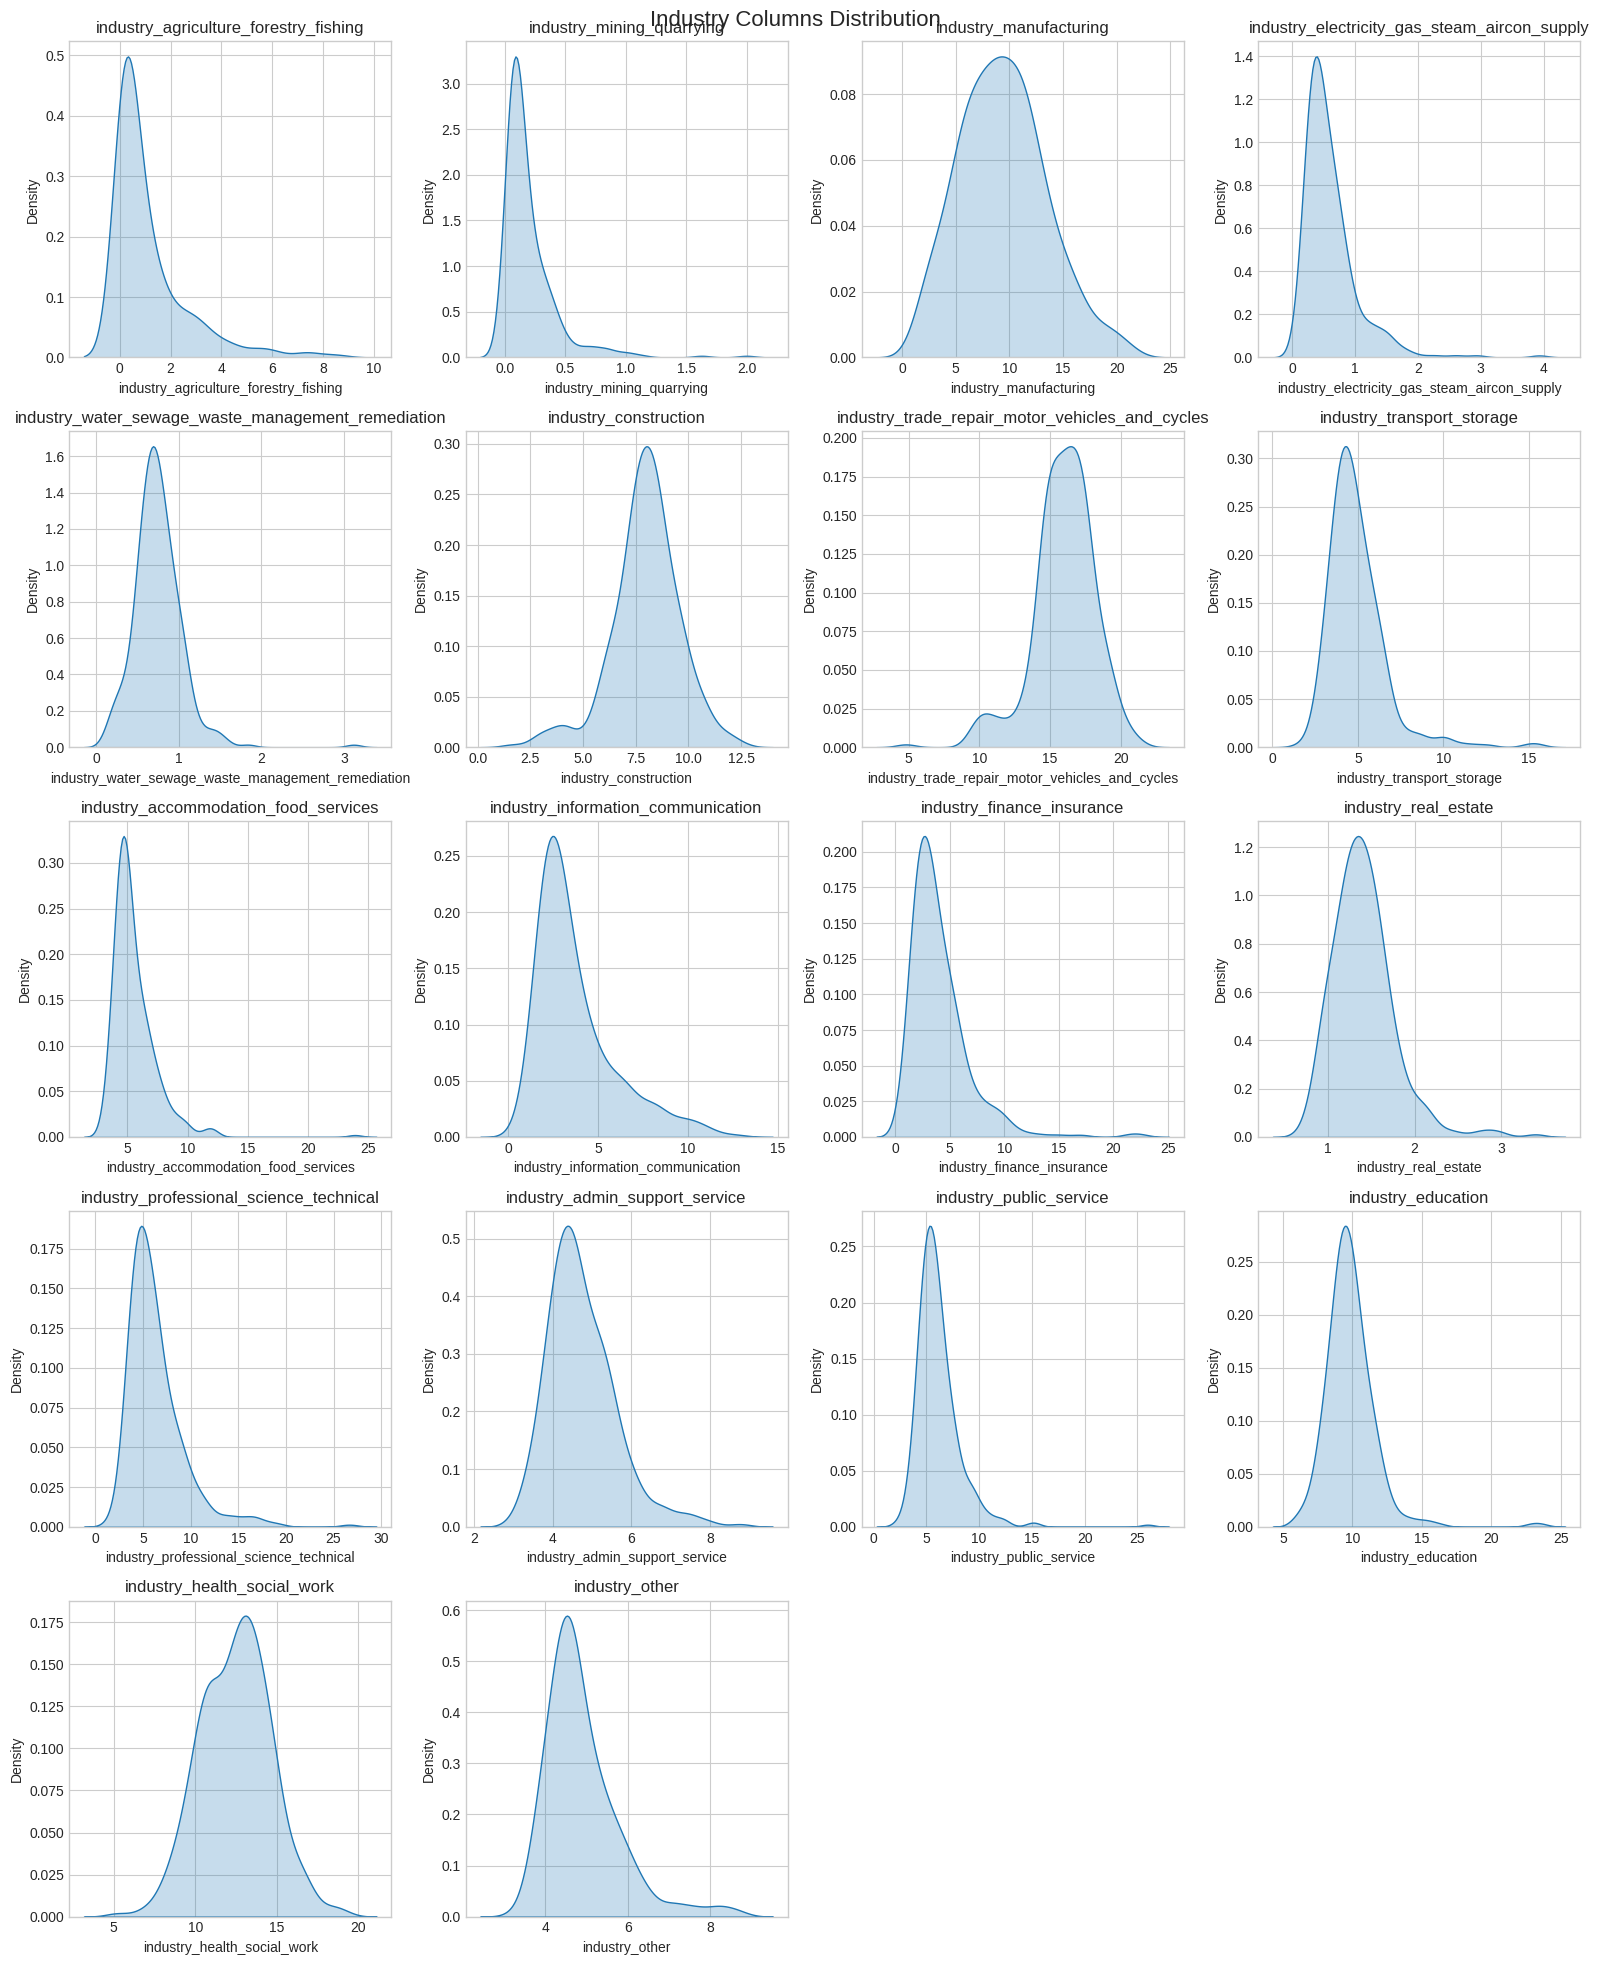

In [67]:
plot_kdeplots(full_df, industry_cols, title="Industry Columns Distribution")

The **Industry Columns Distribution** suggests:
- A significant proportion of the working populace is associated with the manufacturing, motor repair, health, and social work industries, denoting these sectors as dominant employers or industries of focus in the region.

---

## Bivariate Analysis
Bivariate analysis involves the examination of the relationship between two variables. It aims to determine the degree and nature of association between two features, often through scatter plots, correlation coefficients, and cross-tabulations.
In the context of my analysis, bivariate analysis will be particularly insightful for understanding relationships by examining pairs of similar-themed columns, we can uncover relationships and interdependencies that aren't immediately apparent when looking at features in isolation.

In [68]:
full_df[basic_cols].corr()

population_size  area_hectares  population_density  \
population_size     1.000000         0.038351       0.343830             
area_hectares       0.038351         1.000000      -0.381305             
population_density  0.343830        -0.381305       1.000000             
male                0.055720        -0.072384       0.233412             
female             -0.055720         0.072384      -0.233412             
no_passport_held   -0.146366         0.347438      -0.506739             
no_usual_residents -0.205729         0.335648      -0.133063             
median_age         -0.474675         0.467434      -0.719525             

                        male    female  no_passport_held  no_usual_residents  \
population_size     0.055720 -0.055720 -0.146366         -0.205729             
area_hectares      -0.072384  0.072384  0.347438          0.335648             
population_density  0.233412 -0.233412 -0.506739         -0.133063             
male                1.000000 -1.000000 -0.151048          0.111187             
female             -1.000000  1.000000  0.151048         -0.111187             
no_passport_held   -0.151048  0.151048  1.000000          0.205067             
no_usual_residents  0.111187 -0.111187  0.205067          1.000000             
median_age         -0.423224  0.423224  0.454589          0.364966             

                    median_age  
population_size    -0.474675    
area_hectares       0.467434    
population_density -0.719525    
male               -0.423224    
female              0.423224    
no_passport_held    0.454589    
no_usual_residents  0.364966    
median_age          1.000000

In [69]:
basic_cols
len(basic_cols)

8

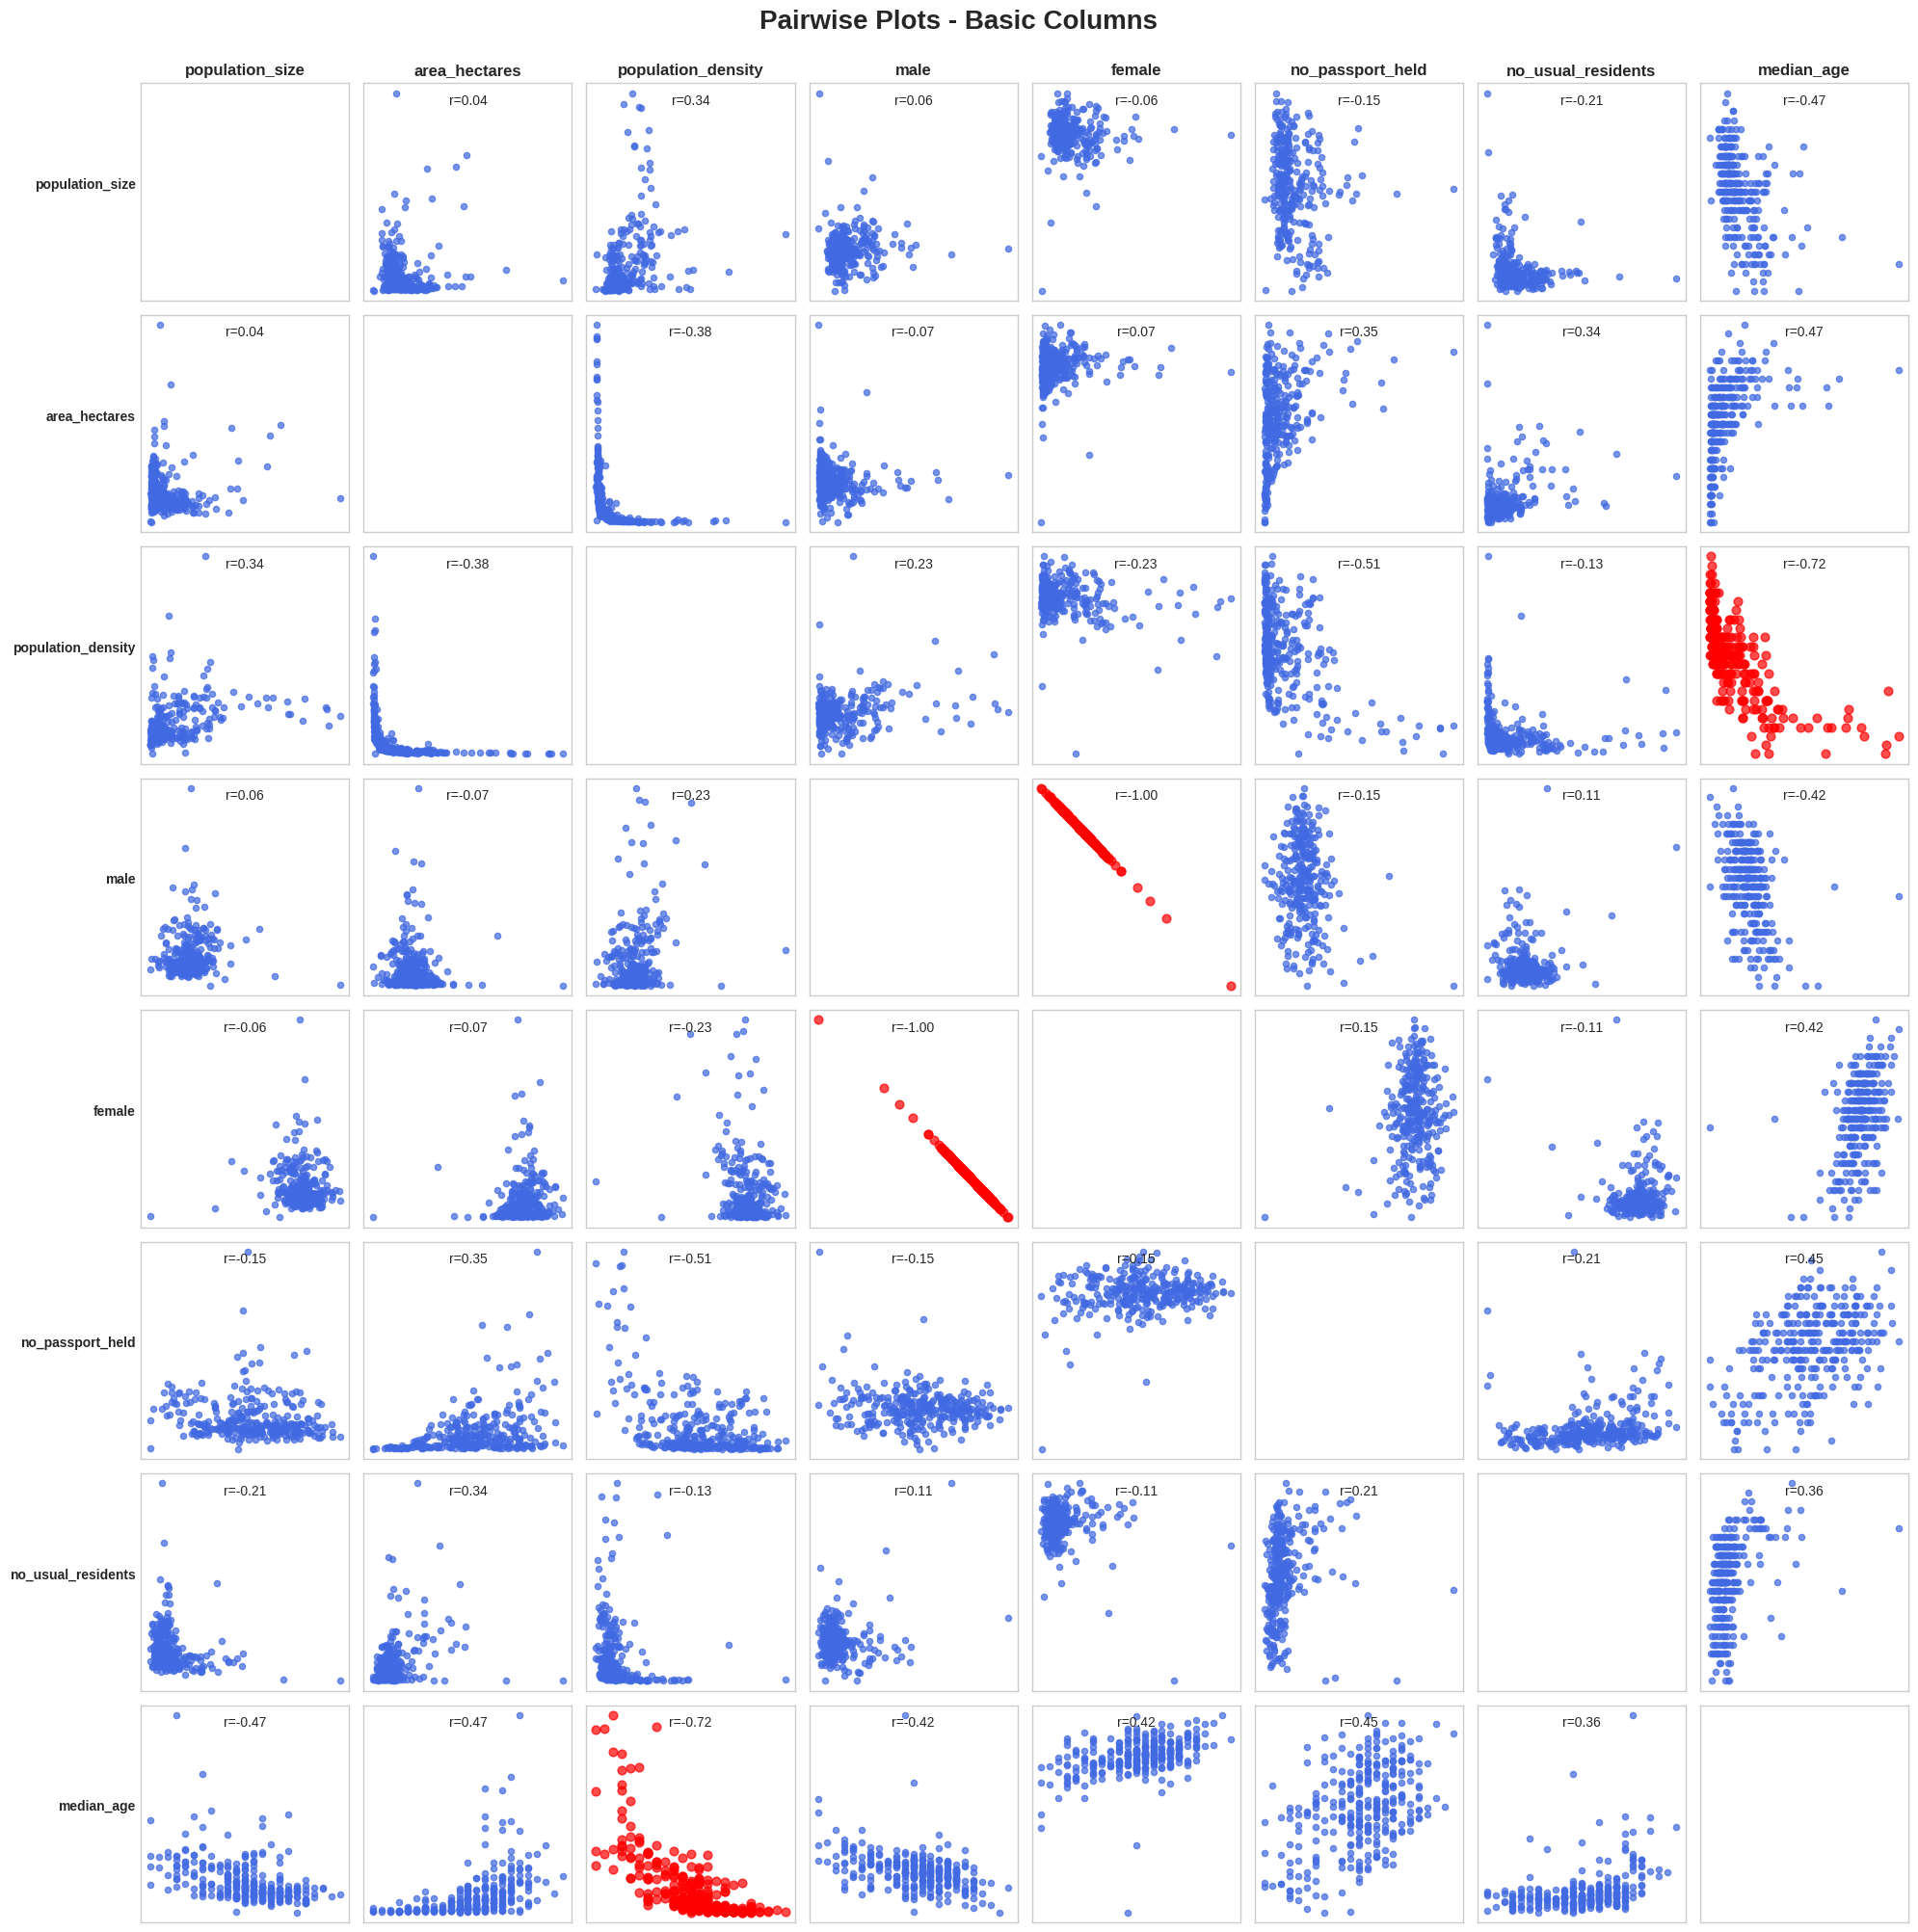

In [70]:
def plot_scatter_grid(data, cols, figsize=(15, 15), title="Pairwise Plots", corr_threshold=0.7):
    n = len(cols)

    # Compute the pairwise correlation matrix
    corr_matrix = data[cols].corr()

    fig, axarr = plt.subplots(n, n, figsize=figsize)

    for i in range(n):
        for j in range(n):
            corr_val = corr_matrix.iloc[i, j]

            # Diagonal plots can be histograms or KDE plots to show distribution
            if i != j:
                color = 'red' if abs(corr_val) >= corr_threshold else 'royalblue'
                size = 40 if abs(corr_val) >= corr_threshold else 20

                axarr[i, j].scatter(data[cols[i]], data[cols[j]], alpha=0.7, color=color, edgecolor=None, s=size)
                axarr[i, j].text(0.5, 0.9, f"r={corr_val:.2f}", transform=axarr[i, j].transAxes, horizontalalignment='center')

            # Remove axis ticks for clarity
            axarr[i, j].set_xticks([])
            axarr[i, j].set_yticks([])

            # Set column labels on the top row
            if i == 0:
                axarr[i, j].set_title(cols[j], fontweight='bold')

            # Set row labels on the first column
            if j == 0:
                axarr[i, j].set_ylabel(cols[i], rotation=0, horizontalalignment='right', fontweight='bold')

    # Display the plot
    fig.suptitle(title, y=1, fontsize=20, fontweight="bold")
    plt.tight_layout()
    plt.show()

plot_scatter_grid(full_df, basic_cols, figsize=(20, 20), title="Pairwise Plots - Basic Columns")

The pairwise plots for the basic columns provide visual insights into the relationships between different features within the dataset.

1. Population Density and Median Age: There is a noticeable correlation of 0.72 between population density and median age. This suggests that regions with higher population density tend to have a specific median age, possibly implying that certain age groups might be more inclined to live in densely populated areas, perhaps due to factors like job opportunities or urban attractions.
2. Male and Female Correlation: The perfect correlation of 1 between male and female populations is expected. In datasets representing a balanced and broad demographic, as the male population for a specific region increases, so does the female population. This essentially captures the total population of the region and highlights the complementary nature of these two features.

These insights underline the significance of bivariate analysis, shedding light on possible relationships between features which can be instrumental in understanding underlying patterns and crafting effective modeling strategies.

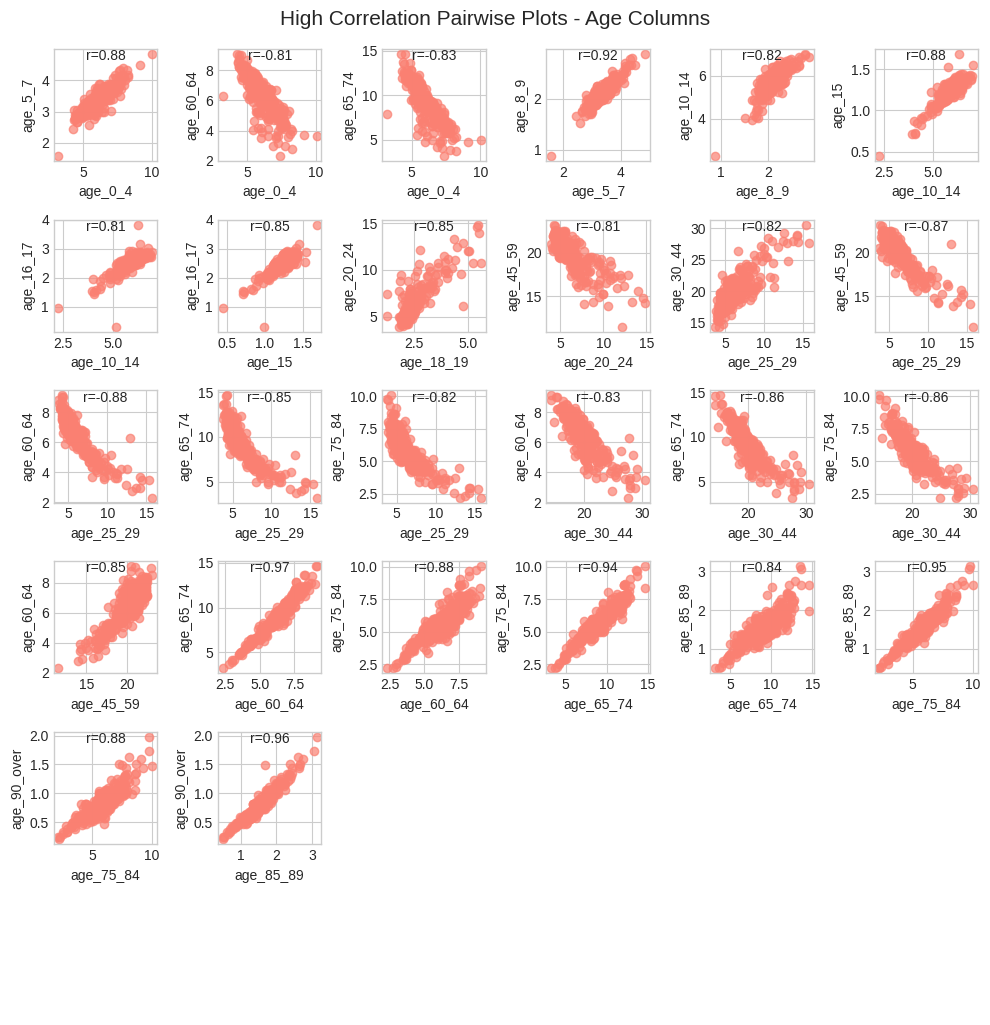

In [71]:
def plot_high_corr_scatter(data, cols, corr_threshold=0.8, figsize=(10, 10), title="High Correlation Pairwise Plots"):
    # Compute the pairwise correlation matrix
    corr_matrix = data[cols].corr()

    # Find pairs that exceed the correlation threshold
    pairs = []
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):  # j starts from i+1 to avoid duplicate pairs and diagonal pairs
            if abs(corr_matrix.iloc[i, j]) > corr_threshold:
                pairs.append((cols[i], cols[j]))

    n = len(pairs)

    # Determine grid size for the plots
    n_side = int(np.ceil(np.sqrt(n)))

    fig, axarr = plt.subplots(n_side, n_side, figsize=figsize)


    # Flatten axarr for easy indexing
    # Handle the case when there's only one subplot
    if n == 1:
        axarr = [axarr]
    else:
        axarr = axarr.ravel()

    for idx, (x, y) in enumerate(pairs):
        ax = axarr[idx]
        ax.scatter(data[x], data[y], alpha=0.7, color="salmon")
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.text(0.5, 0.9, f"r={corr_matrix.loc[x, y]:.2f}", transform=ax.transAxes, horizontalalignment='center')

    # Turn off any remaining unused subplots
    for idx in range(len(pairs), n_side * n_side):
        axarr[idx].axis('off')

    # Display the plot
    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=15)
    plt.show()

plot_high_corr_scatter(full_df, age_cols, title="High Correlation Pairwise Plots - Age Columns")

The visualization showcases pairwise plots specifically for age columns that exceed a high correlation threshold of 0.8. Following are the insights:

1. Inherent Correlation Among Age Columns: The plots illustrate that several age ranges have high correlation values amongst each other. This is expected since neighboring age groups in a region might naturally display correlated trends due to similar population dynamics
2. Predictive Power Implications: High correlation between features can sometimes lead to multicollinearity in regression models, which affects the interpretability of individual feature coefficients. However, for tree-based models, which are more resilient to multicollinearity, understanding these correlations can still help in feature importance interpretations.

In essence, identifying high correlations allows us to get a deeper understanding of the data, inform feature selection decisions, and guide the modeling approach more effectively.

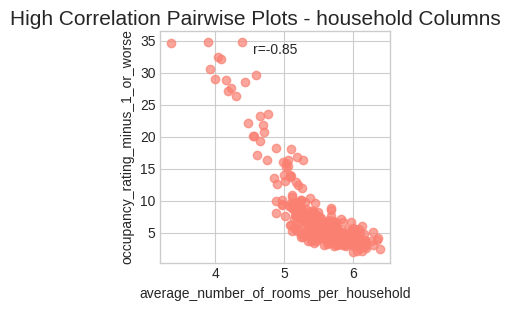

In [72]:
plot_high_corr_scatter(full_df, household_cols, title="High Correlation Pairwise Plots - household Columns", figsize=(3, 3))

The visualization presented focuses on a specific high correlation from the household-related columns, notably between the "average number of rooms per household" and the "occupancy rating minus 1 or worse."
The positive correlation observed indicates that as the average number of rooms in a household increases, there's a higher likelihood of that household having an occupancy rating of minus 1 or worse.

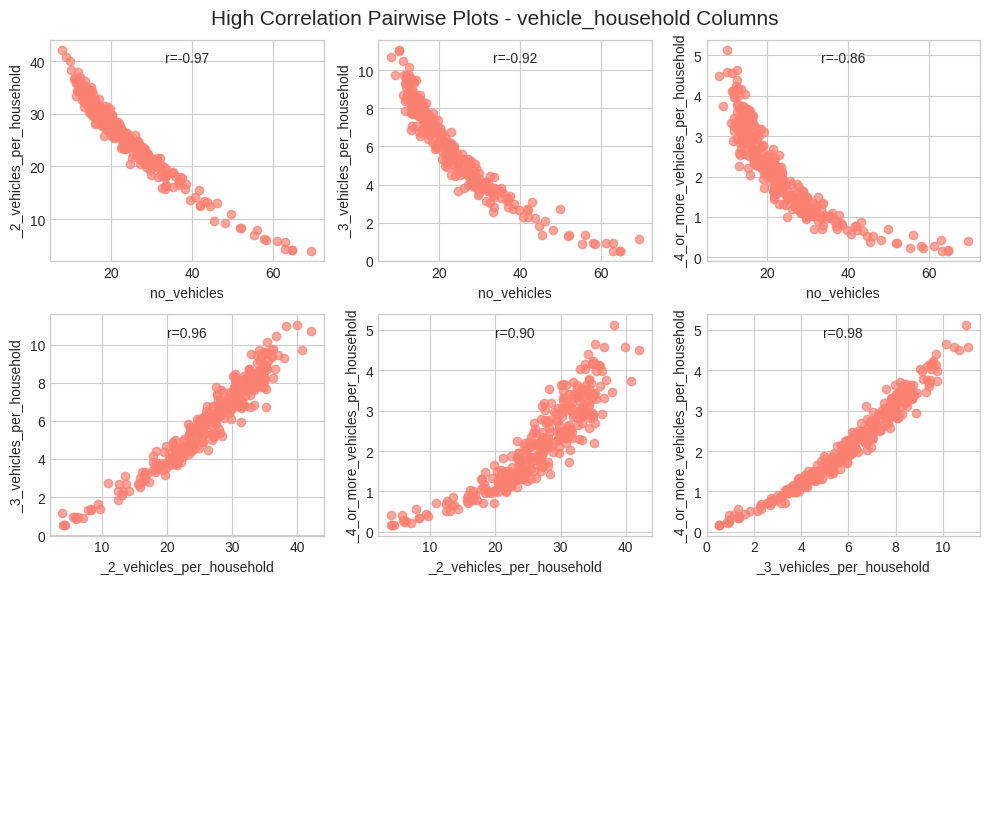

In [73]:
plot_high_corr_scatter(full_df, vehicle_household_cols, title="High Correlation Pairwise Plots - vehicle_household Columns", figsize=(10, 8))

The column "number of vehicles per household" provides an aggregated view of vehicle ownership, while the columns "2 vehicles", "3 vehicles", and "4 vehicles" provide more granular details. A high correlation suggests that as the aggregated number of vehicles in households increases, there's a rise in households owning specifically 2, 3, or 4 vehicles.

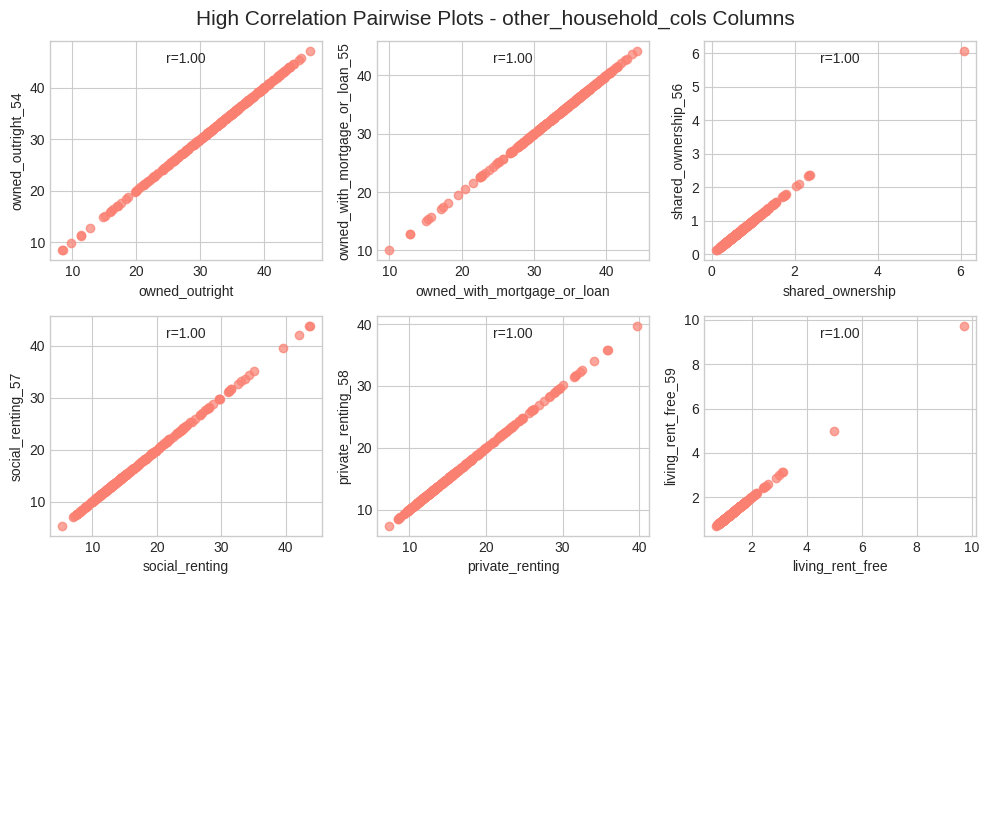

In [74]:
plot_high_corr_scatter(full_df, other_household_cols, title="High Correlation Pairwise Plots - other_household_cols Columns", corr_threshold=0.9, figsize=(10, 8))

The visualization distinctly reveals certain columns within the 'other household' category that exhibit notably high correlations, especially approaching a perfect correlation value of 1.
A striking observation is the perfect correlation between columns such as "owned outright" and "ownedoutright54". This essentially indicates redundancy, where one column could be inferred from the other, making both columns virtually identical in the information they convey.

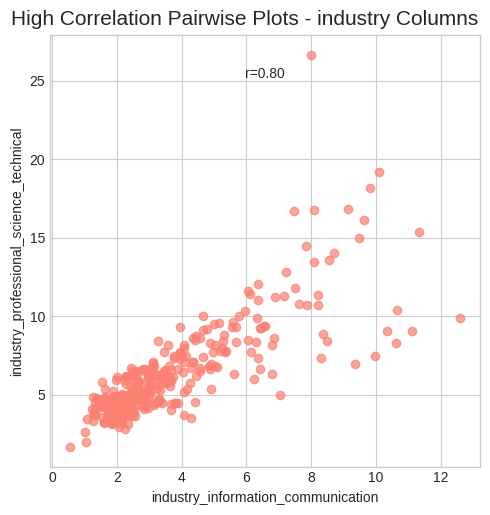

In [75]:
plot_high_corr_scatter(full_df, industry_cols, title="High Correlation Pairwise Plots - industry Columns", corr_threshold=0.8, figsize=(5, 5))

The visualization portrays a notable correlation within the 'industry' category, specifically between "industry information communication" and "industry professional science technical".

This observed correlation suggests that regions or local authorities with a higher concentration of individuals working in "industry information communication" also tend to have a higher concentration of individuals working in the "industry professional science technical" sector. This might imply a certain overlap or synergy between these two industries, possibly due to the intertwining nature of technology and scientific expertise.

## Dimensionality Reduction Visualizations
Dimensionality reduction is a technique to visualize high-dimensional data in 2D space

In [76]:
num_df = full_df[full_df.columns[1:-2]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

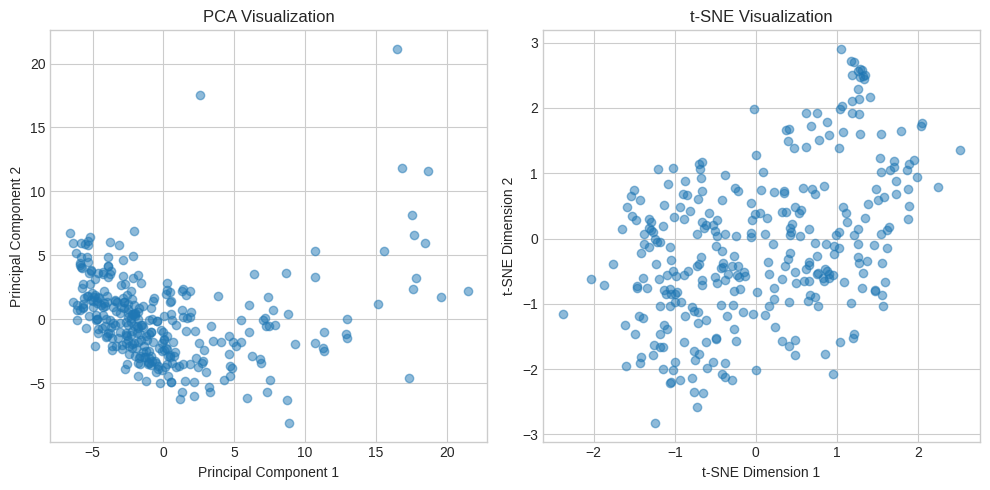

In [77]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')

tsne = TSNE(n_components=2, perplexity=200, n_iter=300)
tsne_results = tsne.fit_transform(scaled_data)
plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.tight_layout()
plt.show()

The t-SNE and PCA plots give a compressed view of the data. Regions that are closer in this 2D space might have similar characteristics.
The lack of distinct patterns in both PCA and t-SNE plots underscores the complexity of our dataset. Such insights imply that relying on simple linear models might not be sufficient to capture the intricacies in the data. Thus, exploring more complex models or ensemble techniques could be beneficial for our predictive tasks.

# Feature Engineering
Here, I am creating various new columns or features by performing operations on existing columns. These new features are often ratios, proportions, or other combinations of columns that might be informative for the model.

In [78]:
df = full_df

- Tree-based models thrive on simple calculated fields like ratios. By creating ratios, we can help the model understand relationships between different fields.
- Age-based proportions can help understand the demographic distribution, which can affect the target variable
- Other features like 'econ_strength' are designed to capture a combined metric of economic strength using home ownership and qualifications.

In [79]:
# Ratio of male to female population
df['male_to_female_ratio'] = df['male'] / df['female']

# Proportion of age groups to the total population
for col in ['age_0_4','age_5_7','age_8_9','age_10_14','age_15','age_16_17','age_18_19','age_20_24','age_25_29','age_30_44','age_45_59','age_60_64','age_65_74','age_75_84','age_85_89','age_90_over']:
    df[f'prop_{col}'] = df.apply(lambda row: row[col] / row['population_size'], axis=1)

# Combine different qualification columns or employment columns to understand broader categorizations
df['total_qualifications'] = df['level_1_to_3_qualification'] + df['apprenticeship'] + df['level_4_and_up'] + df['other_qualifications']
df['high_to_no_qualification'] = df['level_4_and_up'] / df['no_qualifications']

# Economic strength inferred from owning a house and having high-level qualifications.
df['econ_strength'] = (df['owned_outright'] + df['level_4_and_up']) / 2

# Employment Ratio
df['employment_ratio'] = df['employed'] / df['population_size']
df['employment_unemployment_ratio'] = df['employed'] / df['unemployed']

# Proportion of each type of housing or ownership details to the number of household
for col in ['owned_outright','owned_with_mortgage_or_loan','shared_ownership','social_renting','private_renting','living_rent_free']:
    df[f'prop_{col}'] = df.apply(lambda row: row[col] / row['number_of_households'], axis=1)

# Ratio of single-person households to family households
df['single_to_family_ratio'] = df['one_person_household'] / df['one_family_household']

# Simplifying features by aggregating
df['total_children'] = df['age_0_4'] + df['age_5_7'] + df['age_8_9'] + df['age_10_14']

# Proportion of different industries to the total population to capture dominant industries
industry_columns = ['industry_agriculture_forestry_fishing', 'industry_mining_quarrying', 'industry_manufacturing',	'industry_electricity_gas_steam_aircon_supply', 'industry_water_sewage_waste_management_remediation','industry_construction','industry_trade_repair_motor_vehicles_and_cycles','industry_transport_storage','industry_accommodation_food_services','industry_information_communication','industry_finance_insurance','industry_real_estate','industry_professional_science_technical','industry_admin_support_service','industry_public_service','industry_education','industry_health_social_work','industry_other']
for col in industry_columns:
    df[col + '_prop'] = df[col] / df['population_size']


## Correlation Analysis
Correlation analysis provides insights into the linear relationships between pairs of variables. A correlation value close to 1 implies a strong positive relationship, a value close to -1 implies a strong negative relationship, and a value close to 0 implies no relationship.

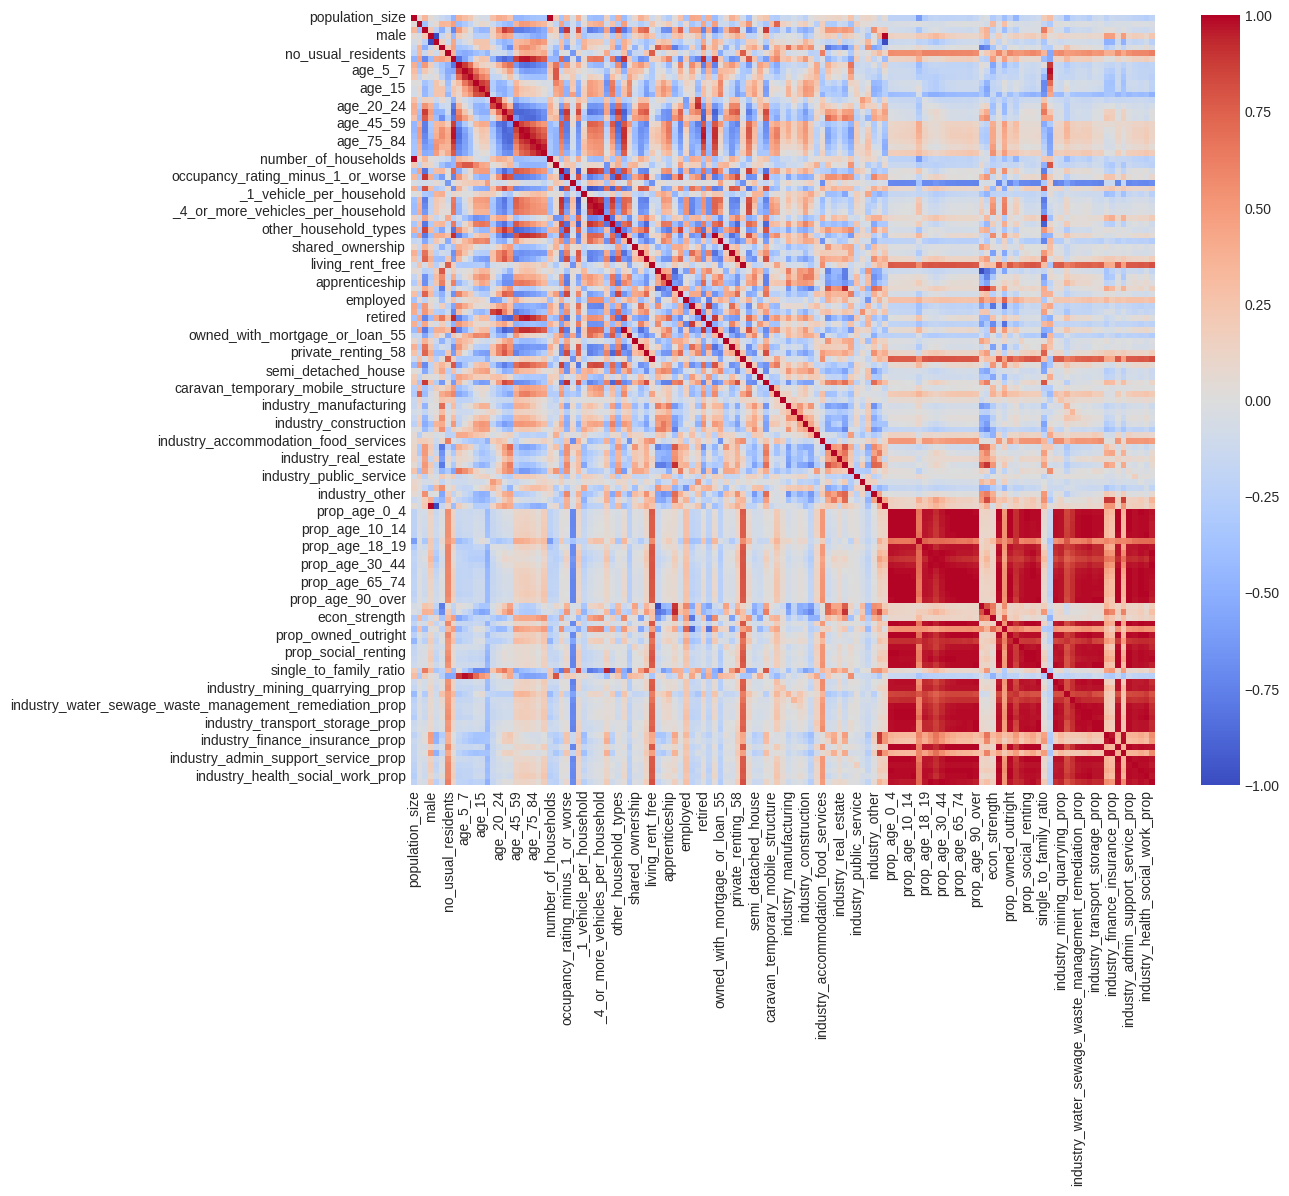

In [81]:
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

From our heatmap visualization, it's evident that a good number of proportion features exhibit high correlation with each other. This suggests that some of these features might be providing redundant information. In contrast, many of the other generated features and the standard features don't seem to have a high correlation with each other, implying that they are providing diverse information to our models.
It would be a good idea to remove the highly correlated features as a part of feature selection. I am doing this during KFold cross validation during the modelling stage.

In [87]:
df.shape

(317, 133)

The numeric data in num_df is standardized using the StandardScaler from scikit-learn. This process transforms the features to have a mean of 0 and a standard deviation of 1, which can be beneficial for many machine learning algorithms. By doing this, we ensure that our numerical features have a consistent scale, which can improve the performance and stability of some machine learning algorithms.

In [88]:
num_df = df.drop(['GeographyCode','_2011','_merge'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

## Data Preparation for Modelling

In [93]:
X = pd.DataFrame(scaled_data, columns=num_df.columns)
y = full_df[target_col]
print(X.shape, y.shape)

(317, 130) (317,)


# Modelling
In this section, I design the data modelling approach for predicting household income using the prepared dataset. The approach starts with K-fold cross-validation, which systematically evaluates model performance by rotating through different testing sets. To hone the models, I employ feature selection within this validation, ensuring we utilize only the most influential attributes.

From here, I deploy a range of baseline models, spanning tree-based algorithms like Random Forest and Gradient Boosting to advanced contenders such as CatBoost and XGBoost. To ensure these models deliver their best, I fine-tune their settings using Bayesian Optimization, a method celebrated for its efficient hyperparameter search.

Concluding the approach, I experiment with ensemble techniques, namely Stacking and Voting Regressors, aiming to amalgamate the strengths of individual models for superior predictions.

In [99]:
# Function to perform K-fold cross-validation
def kfold_cv(trn, target, estimator_name, estimator, n_splits=5, shuffle_val=False, featimp=False):
    featimp_list = [] # list to store feature importance values
    add = 0
    splits = n_splits

    # Initialize KFold object with or without shuffling
    if shuffle_val:
        kfold, scores = KFold(n_splits=splits, shuffle=shuffle_val), list()
    else:
        kfold, scores = KFold(n_splits=splits, shuffle=shuffle_val, random_state=42), list()

    # Iterating over each split and training the model
    for train, test in kfold.split(trn, target):
        # Splitting the data
        x_train, x_test = trn.values[train], trn.values[test]
        y_train, y_test = target.values[train], target.values[test]

        # Model training
        model = estimator
        model.fit(x_train, y_train)

        # Model prediction
        preds = model.predict(x_test)

        # Extracting and storing feature importance
        if featimp:
            feature_importances = pd.DataFrame(model.feature_importances_,
                                               index=trn.columns,
                                               columns=['importance'])
            featimp_list.append(feature_importances.values)

        # Calculate the RMSLE score
        score = np.sqrt(mean_squared_log_error(y_test, preds))
        scores.append(score)

    # Calculating the average score
    avg_score = np.sum(scores)/len(scores)
    print(f"Average of model {estimator_name} is {avg_score} and per fold scores are {scores}")

    # Displaying the feature importance (if the flag is set)
    if featimp:
        for item in featimp_list:
            add += item
        df_cv = pd.DataFrame(add/len(featimp_list), index=trn.columns, columns=["importance"]).sort_values('importance', ascending=False)
        #display(df_cv)

        # Plotting feature importance
        df_cv[:20].plot(kind='bar', figsize=(10, 7))  # Displaying top 20 features for clarity
        plt.title('Feature Importances')
        plt.show()


    return avg_score

# Function to perform K-fold cross-validation with feature selection
def kfold_cv_with_feature_selection(trn, target, estimator_name, estimator, n_splits=5, shuffle_val=False, featimp=False, top_k_features=10):
    featimp_list = [] # list to store feature importance values (if applicable)
    add = 0
    splits = n_splits

    # Initialize KFold object with or without shuffling
    if shuffle_val:
        kfold, scores = KFold(n_splits=splits, shuffle=shuffle_val), list()
    else:
        kfold, scores = KFold(n_splits=splits, shuffle=shuffle_val, random_state=42), list()

    # Iterating over each split, performing feature selection and then training the model
    for train, test in kfold.split(trn, target):
        # Splitting the data
        x_train, x_test = trn.values[train], trn.values[test]
        y_train, y_test = target.values[train], target.values[test]

        # Feature Selection using SelectKBest
        selector = SelectKBest(score_func=f_regression, k=top_k_features)
        x_train = selector.fit_transform(x_train, y_train)
        x_test = selector.transform(x_test)

        # Model training
        model = estimator
        model.fit(x_train, y_train)

        # Model prediction
        preds = model.predict(x_test)

        # Extracting and storing feature importance (if the flag is set)
        if featimp:
            selected_features = trn.columns[selector.get_support()]
            feature_importances = pd.DataFrame(model.feature_importances_,
                                               index=selected_features,
                                               columns=['importance'])
            featimp_list.append(feature_importances.values)

        # Calculate the RMSLE score
        score = np.sqrt(mean_squared_log_error(y_test, preds))
        scores.append(score)

    # Calculating the average score
    avg_score = np.mean(scores)
    print(f"Average of model {estimator_name} is {avg_score} and per fold scores are {scores}")

    # Displaying the feature importance (if the flag is set)
    if featimp:
        for item in featimp_list:
            add += item
        df_cv = pd.DataFrame(add / len(featimp_list), index=selected_features, columns=["importance"]).sort_values('importance', ascending=False)
        display(df_cv)

    return avg_score

In [100]:
baseline_models = {
    "rfreg" : RandomForestRegressor(n_jobs=-1),
    "lgb" : LGBMRegressor(verbose=-1),
    'xgb' : XGBRegressor(objective ='reg:squarederror',n_estimators=50),
    'extratrees' : ExtraTreesRegressor(n_jobs=-1),
    'DTReg' : DecisionTreeRegressor(),
    "KNN Reg" : KNeighborsRegressor(),
    "CB REg" : CatBoostRegressor(verbose=False),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet":ElasticNet(random_state=0),
    "GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
}

Average of model GradientBoostingRegressor is 0.11196694837636618 and per fold scores are [0.06713208678291109, 0.09100490756726201, 0.18339123908202248, 0.1450622603850666, 0.07324424806456874]


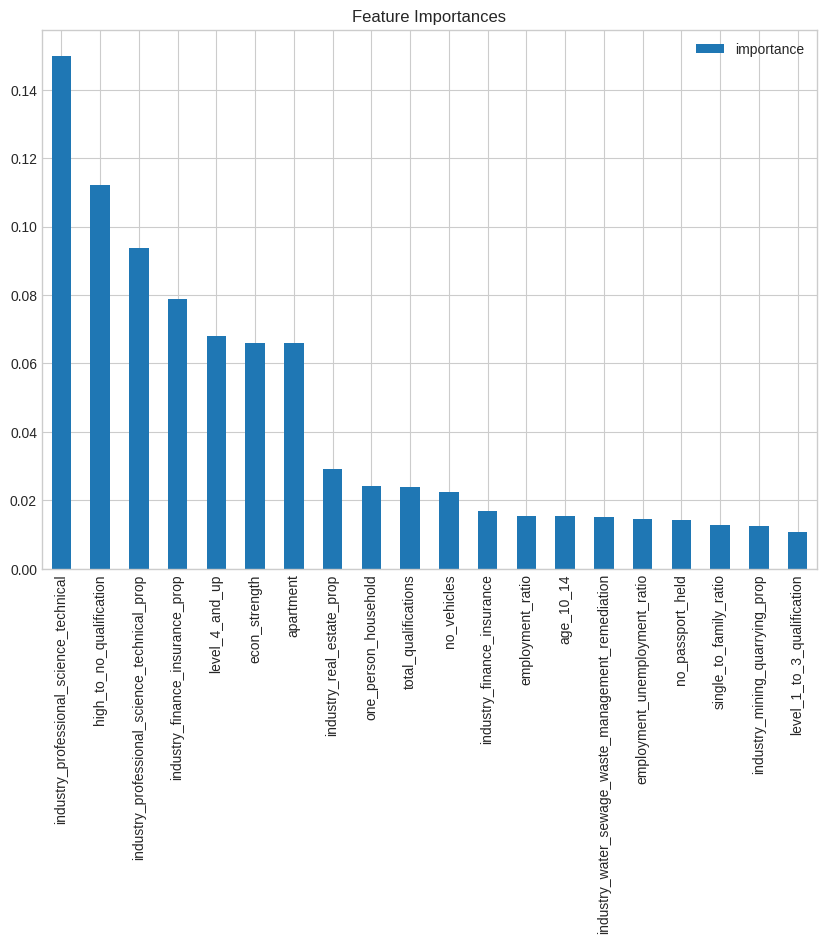

0.11196694837636618

In [101]:
kfold_cv(X, y, "GradientBoostingRegressor", baseline_models["GradientBoostingRegressor"], n_splits=5, shuffle_val=True, featimp=True)


The feature importance visualization derived from the model offers intriguing insights. At the forefront is the industry_professional_science_technical feature, which suggests a notable contribution of the professional, science, and technical sectors to the gross domestic household income. This is followed by high_to_no_qualification, indicating a significant relationship between household income and the educational spectrum, from the highest qualifications down to none.

Interestingly, the feature engineering efforts proved valuable. The generated features like industry_finance_insurance_prop and econ_strength are among the top determinants of the target variable, reinforcing the importance of the finance, insurance, and property sectors, as well as the overall economic strength in predicting household income. Additionally, features such as level4andup and apartment further reflect the role of advanced education and property types in determining income levels.

In conclusion, the model underscores both the original and engineered features as critical drivers of the household income, attesting to the success of our data preprocessing and feature engineering strategies.

## Model Scores with Engineered Features and Feature Elimination

In [77]:
fs_model_scores = {}
for model_name, model in baseline_models.items():
    score = kfold_cv_with_feature_selection(X, y, model_name, model, n_splits=5, shuffle_val=True, top_k_features=90)
    fs_model_scores[model_name] = score

Average of model rfreg is 0.12094912356304939 and per fold scores are [0.0613187135429493, 0.24284791507050943, 0.08474651910468882, 0.057543220341661164, 0.1582892497554382]
Average of model lgb is 0.14327618341695852 and per fold scores are [0.16602719527954968, 0.19344323378867917, 0.11317739713240355, 0.125766046709661, 0.11796704417449919]
Average of model xgb is 0.09579236995811485 and per fold scores are [0.08456955128179114, 0.13730161408230035, 0.08670052952354353, 0.06430298732008596, 0.10608716758285325]
Average of model extratrees is 0.11660563412443985 and per fold scores are [0.24305428479510902, 0.09450530014594584, 0.051895380148113415, 0.1382040532094272, 0.055369152323603864]
Average of model DTReg is 0.11815308331703811 and per fold scores are [0.09611037518622062, 0.09472740687418685, 0.10680080343693643, 0.1632352708930531, 0.12989156019479353]
Average of model KNN Reg is 0.1138221512062116 and per fold scores are [0.06846303722801103, 0.12263126214088127, 0.062612

In [80]:
## Best Models
fs_best_model_names = sorted(fs_model_scores, key=fs_model_scores.get)[:5]
fs_best_models = {name: baseline_models[name] for name in fs_best_model_names}
fs_best_models

{'Ridge': Ridge(),
 'CB REg': <catboost.core.CatBoostRegressor at 0x7905a645ed10>,
 'xgb': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 'KNN Reg': KNeighborsRegressor(),
 'extratrees': ExtraTreesRegressor(n_jobs=-1)}

## Hyperparameter Optimization
The objective here is to find the best parameters for the models to improve their performance. I have chosen Bayesian Optimization hyperparameter as it intelligently explores the hyperparameter space and converges more quickly than a grid or random search. It uses past evaluation results to inform which hyperparameters should be tried next.


In [84]:
def gbr_eval(n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf, subsample):
    gbr = GradientBoostingRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        subsample=subsample,
        random_state=42
    )
    return cross_val_score(gbr, X, y, cv=3, scoring="neg_mean_squared_log_error").mean()

gbrBO = BayesianOptimization(
    gbr_eval, {
        'n_estimators': (50, 500),
        'learning_rate': (0.005, 0.3),
        'max_depth': (3, 10),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 10),
        'subsample': (0.5, 1)
    },
    random_state=42
)

gbrBO.maximize(n_iter=15)
print(gbrBO.max)

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -0.1528   | 0.1155    | 9.655     | 7.588     | 6.789     | 120.2     | 0.578     |
| 2         | -0.04515  | 0.02213   | 9.063     | 6.41      | 7.665     | 59.26     | 0.985     |
| 3         | -0.1462   | 0.2506    | 4.486     | 2.636     | 3.467     | 186.9     | 0.7624    |
| 4         | -0.2926   | 0.1324    | 5.039     | 6.507     | 3.116     | 181.5     | 0.6832    |
| 5         | -0.1624   | 0.1395    | 8.496     | 2.797     | 6.114     | 316.6     | 0.5232    |
| 6         | -0.2765   | 0.2273    | 9.003     | 6.311     | 4.931     | 248.4     | 0.8931    |
| 7         | -0.2844   | 0.04164   | 7.989     | 7.666     | 3.251     | 335.2     | 0.9424    |
| 8         | -0.1642   | 0.06705   | 9.947     | 2.925     | 7.608     | 273.0     | 0.6438    |
| 9         | -0.309

In [85]:
# Define the function for evaluation
def catboost_eval(learning_rate, depth, l2_leaf_reg, bagging_temperature, border_count, model_size_reg):
    params = {
        'learning_rate': learning_rate,
        'depth': int(depth),
        'l2_leaf_reg': l2_leaf_reg,
        'bagging_temperature': bagging_temperature,
        'border_count': int(border_count),
        'model_size_reg': model_size_reg,
        'loss_function': 'RMSE',
        'eval_metric': 'RMSE',
        'verbose': False,
        'random_seed': 42
    }

    cat_model = CatBoostRegressor(**params)
    return cross_val_score(cat_model, X, y, cv=3, scoring="neg_mean_squared_log_error").mean()

# Parameter space
param_space = {
    'learning_rate': (0.005, 0.3),
    'depth': (5, 10),
    'l2_leaf_reg': (1, 10),
    'bagging_temperature': (0, 1),
    'border_count': (32, 255),
    'model_size_reg': (0.5, 2)
}

catBO = BayesianOptimization(f=catboost_eval, pbounds=param_space, random_state=42)

# Run optimization
catBO.maximize(n_iter=15)
print(catBO.max)

|   iter    |  target   | baggin... | border... |   depth   | l2_lea... | learni... | model_... |
-------------------------------------------------------------------------------------------------
| 1         | -0.02361  | 0.3745    | 244.0     | 8.66      | 6.388     | 0.05103   | 0.734     |
| 2         | -0.03131  | 0.05808   | 225.2     | 8.006     | 7.373     | 0.01107   | 1.955     |
| 3         | -0.01775  | 0.8324    | 79.35     | 5.909     | 2.651     | 0.09475   | 1.287     |
| 4         | -0.02276  | 0.4319    | 96.94     | 8.059     | 2.255     | 0.09118   | 1.05      |
| 5         | -0.03109  | 0.4561    | 207.1     | 5.998     | 5.628     | 0.1798    | 0.5697    |
| 6         | -0.01997  | 0.3937    | 60.42     | 9.318     | 9.711     | 0.1011    | 1.983     |
| 7         | -0.02017  | 0.434     | 79.1      | 6.661     | 3.241     | 0.2026    | 1.561     |
| 8         | -0.01774  | 0.5155    | 82.25     | 5.442     | 1.142     | 0.2076    | 1.082     |
| 9         | -0.017

In [82]:
def extratrees_eval(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, bootstrap):
    etr = ExtraTreesRegressor(
        n_estimators=int(n_estimators),
        max_depth=None if max_depth <= 0 else int(max_depth),  # Handle max_depth as it can't be <=0
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features=max_features,
        bootstrap=bool(round(bootstrap)),  # Convert float to int, then to boolean
        random_state=42,
        n_jobs=-1
    )
    return cross_val_score(etr, X, y, cv=3, scoring="neg_mean_squared_log_error").mean()

# Parameter space
param_space = {
    'n_estimators': (10, 500),
    'max_depth': (-1, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': (0.1, 1.0),
    'bootstrap': (0, 1)
}

# Instantiate the Bayesian optimization object
etrBO = BayesianOptimization(f=extratrees_eval, pbounds=param_space, random_state=42)

etrBO.maximize(n_iter=15)
print(etrBO.max)

|   iter    |  target   | bootstrap | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------
| 1         | -0.02393  | 0.3745    | 47.49     | 0.7588    | 12.37     | 4.808     | 86.44     |
| 2         | -0.02604  | 0.05808   | 43.17     | 0.641     | 14.45     | 2.371     | 485.3     |
| 3         | -0.02869  | 0.8324    | 9.829     | 0.2636    | 4.485     | 7.476     | 267.1     |
| 4         | -0.03267  | 0.4319    | 13.85     | 0.6507    | 3.65      | 7.259     | 189.5     |
| 5         | -0.02771  | 0.4561    | 39.04     | 0.2797    | 10.77     | 12.66     | 32.76     |
| 6         | -0.0231   | 0.008464  | 48.39     | 0.6329    | 14.68     | 13.72     | 80.74     |
| 7         | -0.02988  | 0.688     | 48.77     | 0.1836    | 14.46     | 11.45     | 81.35     |
| 8         | -0.02407  | 0.2104    | 49.62     | 0.2925    | 14.32     | 10.92     | 151.0     |
| 9         | -0.026

In [83]:
def xgb_eval(n_estimators, learning_rate, max_depth, gamma, min_child_weight, subsample, colsample_bytree):
    xgb = XGBRegressor(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective='reg:squarederror',
        random_state=42
    )
    return cross_val_score(xgb, X, y, cv=3, scoring="neg_mean_squared_log_error").mean()

# Parameter space
param_space = {
    'n_estimators': (50, 500),
    'learning_rate': (0.005, 0.3),
    'max_depth': (3, 10),
    'gamma': (0, 5),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1)
}

# Instantiate the Bayesian optimization object
xgbBO = BayesianOptimization(f=xgb_eval, pbounds=param_space, random_state=42)

# Run optimization
xgbBO.maximize(n_iter=15)

# Print results
print(xgbBO.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | -0.1563   | 0.6873    | 4.754     | 0.2209    | 7.191     | 2.404     | 120.2     | 0.529     |
| 2         | -0.2957   | 0.9331    | 3.006     | 0.2139    | 3.144     | 9.729     | 424.6     | 0.6062    |
| 3         | -0.2997   | 0.5909    | 0.917     | 0.09475   | 6.673     | 4.888     | 181.1     | 0.8059    |
| 4         | -0.1767   | 0.5697    | 1.461     | 0.1131    | 6.192     | 8.067     | 139.9     | 0.7571    |
| 5         | -0.1982   | 0.7962    | 0.2323    | 0.1842    | 4.194     | 1.585     | 477.0     | 0.9828    |
| 6         | -0.03834  | 0.6045    | 0.0       | 0.005     | 3.0       | 10.0      | 90.63     | 0.9644    |
| 7         | -0.1581   | 0.5136    | 2.353     | 0.1631    | 3.75      | 9.525     | 91.47     | 0.8608    |
| 8       

In our quest to achieve the best predictive performance, fine-tuning our models' hyperparameters is paramount. The above output displayed above reflects the meticulous optimization process applied to the XGBoost regressor using Bayesian Optimization. This technique methodically explores the hyperparameter space, leveraging prior evaluations to determine the most promising parameters to test next, ensuring an efficient and effective search.

The columns represent the hyperparameters under consideration, and for each iteration, the combination's efficacy is logged. This process was similarly undertaken for Gradient Boosting, CatBoost, and ExtraTrees regressors. By the end of the iterations, the most optimal hyperparameter set is highlighted, which we subsequently adopt for our modeling to ensure superior performance.

In essence, this optimization step fine-tunes our models, enabling them to perform at their peak on our dataset.

## Best Model Configurations
Post our rigorous hyperparameter optimization, we've derived the most optimal configurations for our ensemble of models, ensuring they are primed for maximum performance.

In [87]:
gbr_params = {
    'learning_rate': 0.005,
    'max_depth': int(9.16946971013724),
    'min_samples_leaf': int(3.2931861241732316),
    'min_samples_split': int(8.939981683114034),
    'n_estimators': int(58.887549445627954),
    'subsample': 1.0
}
gbrBest = GradientBoostingRegressor(**gbr_params)

cb_params = {
    'bagging_temperature': 1.0,
    'border_count': int(76.96390893905104),
    'depth': int(5.0),
    'l2_leaf_reg': 1.0,
    'learning_rate': 0.005,
    'model_size_reg': 0.5
}
cbBest = CatBoostRegressor(**cb_params)

et_params = {
    'bootstrap': bool(round(0.008464421617309537)),
    'max_depth': int(48.389157997476524),
    'max_features': 0.6329310399899775,
    'min_samples_leaf': int(14.67809309130929),
    'min_samples_split': int(13.724897080808262),
    'n_estimators': int(80.73863384614044)
}
etBest = ExtraTreesRegressor(**et_params)

xgb_params = {
    'colsample_bytree': 0.6586117504386848,
    'gamma': 0.4532641953946348,
    'learning_rate': 0.048127828490842385,
    'max_depth': int(8.666138128442817),
    'min_child_weight': int(9.804388674387097),
    'n_estimators': int(88.58046879946505),
    'subsample': 0.592344814203444
}
xgbBest = XGBRegressor(**xgb_params)

## Stacking Regressor

In [88]:
%%time
model = StackingRegressor([('gbr', gbrBest),
          ('xgb',  xgbBest),
          ('cb',cbBest)], n_jobs=-1)
model_name  = 'Stacking Reg'
kfold_cv_with_feature_selection(X, y, model_name, model, n_splits=10, shuffle_val=True)

Average of model Stacking Reg is 0.1462562503257107 and per fold scores are [0.11371056205207025, 0.08744174613175314, 0.11048369593515409, 0.10603504826238698, 0.11466732648786528, 0.08316074810107689, 0.1152315902626333, 0.2915813619700156, 0.08315118912067893, 0.3570992349334726]
CPU times: user 1.31 s, sys: 810 ms, total: 2.12 s
Wall time: 1min 14s


0.1462562503257107

In [89]:
%%time
voting_model = VotingRegressor([('gbr', gbrBest),
          ('xgb',  xgbBest),
          ('cb',cbBest)], n_jobs=-1)
model_name = 'Voting Regressor'
kfold_cv_with_feature_selection(X, y, model_name, voting_model, n_splits=10, shuffle_val=True)

Average of model Voting Regressor is 0.11901575470900556 and per fold scores are [0.07987106856241281, 0.10168900032033705, 0.08752803597014383, 0.11345780160909041, 0.31010276425765143, 0.16931030571265057, 0.08355449835545185, 0.06872666255196769, 0.1033107613967919, 0.07260664835355818]
CPU times: user 602 ms, sys: 418 ms, total: 1.02 s
Wall time: 15.6 s


0.11901575470900556

In my exploration of ensemble techniques, I employed two powerful ensemble methods: Stacking and Voting.

1. Stacking Regressor: I integrated the capabilities of GBR, XGBoost, and CatBoost into a Stacked model. This ensemble provided an average error score of approximately 0.1463 across all folds. The runtime of this model was around 1 minute and 14 seconds, reflecting the intricate computation of stacking these models.

2. Voting Regressor: Using a simpler consensus-based mechanism, the Voting Regressor combined predictions from the fine-tuned GBR, XGBoost, and CatBoost models. It yielded an impressive average score of roughly 0.1190, marking an improvement from the stacking technique. The score distribution across folds was relatively consistent. It was also computationally more efficient, completing in about 15.6 seconds.

---
# Conclusion

From the beginning of this project, I endeavoured to predict gross domestic household income based on a wide range of factors. Through rigorous data exploration, preprocessing, feature engineering, and modelling, I tackled this challenge systematically. The feature engineering phase was pivotal, introducing nuances that bolstered model performance. Subsequent hyperparameter optimization fine-tuned the models to improve the predictive power even further.

By employing ensemble techniques, I combined their predictive power for enhanced results. In conclusion, I tackled the task of predicting household income and, through meticulous and iterative efforts, achieved an insightful model that can predict income with a notable degree of accuracy. This underscores the significance of methodical data analysis and advanced modeling in addressing real-world challenges.

---